## 3.1

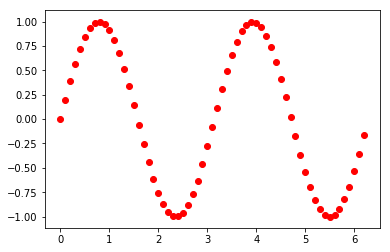

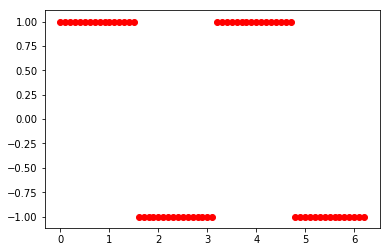

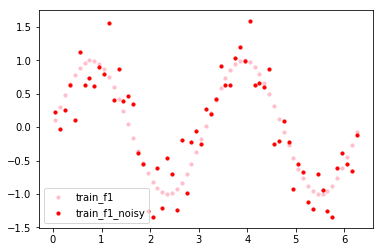

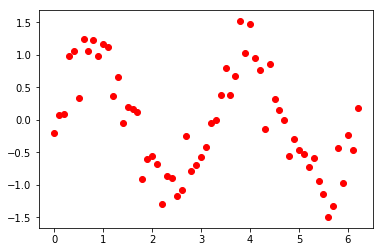

In [2]:
import math
from math import sin
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import random


def draw_1_scatter (l0, l1, color):
    plt.scatter (l0, l1, c=color)
    plt.show()
    
def draw_2_scatters ( l0, l1, color1, label1, l2, color2, label2):
    p1=plt.scatter (l0, l1, c=color1, s=10) # s: marker size
    p2=plt.scatter (l0, l2, c=color2, s=10)
    
    plt.legend( (p1,p2), (label1, label2), scatterpoints=1, loc='lower left', ncol=1, fontsize=10)
    plt.show()
    
def draw_1_line (title, xlabel, ylabel, ymin,ymax, l0, l1, color1, label1  ):

    fig = plt.figure() 
    ax = plt.subplot(111)
    ax.plot(l0, l1, c=color1, label= label1 )
    plt.title(title )
    ax.legend()
    plt.xlabel(xlabel ) 
    plt.ylabel(ylabel )
    ax.set_ylim([ymin,ymax])
#     plt.savefig('D:/Sweden/p3/ANN/lab1/part2/'+ title + '.png', dpi=300)
    plt.show()
    
def generate_target_f1 (inputData):
    f1= [sin (2 * x) for x in inputData   ] 
    return f1

def generate_target_f2 (f1):
    f2=[]
    for i in range (0, len(f1) ):
        if ( f1[i] >= 0 ):
            f2.append (1)
        else:
            f2.append (-1)
    return f2

def generate_x_f1_f2 (x_start, x_end, x_step):
    train_in = np.arange (x_start, x_end, x_step)
    f1 = generate_target_f1(train_in)
    f2= generate_target_f2 (f1)
    f1 = np.array (f1,dtype=float)
    f2 = np.array (f2,dtype=float)
    train_in = np.array(train_in, dtype=float)  # convert from list to array
#     train_in = np.transpose(train_in)  # from row vector to column vector
    return train_in, f1, f2


def draw_learning_curve(error_list):
    x = np.arange(1, np.size(error_list)+1, 1)
    y = error_list
    plt.plot(x, y, 'r--')
    plt.title ("learning curve")
    plt.show()
    
def mean_squared_error(prediction, target, data_input):
    constant = 0.5/(len(data_input[0]))
    mse = constant * (prediction - target)**2
    return  mse

def absolute_residual_error(prediction, target, data_input):
    constant = 1/(len(data_input))
    summed_e =0
    for i in range (0, len(data_input)) :
        summed_e += abs(prediction[i] - target[i])
    avg_e = constant * summed_e

    return avg_e


def add_noise (target, noise_std_dev): 
    noise_mean=0
    noise = np.random.normal(noise_mean, noise_std_dev, target.shape)  # np.random.normal(mu, sigma, 1000)
    target_with_noise = target + noise
    return target_with_noise

train_in, train_f1, train_f2 = generate_x_f1_f2 (0, 2*pi, 0.1)
test_in, test_f1, test_f2  = generate_x_f1_f2 (0.05, 2*pi, 0.1)

draw_1_scatter ( train_in, train_f1, 'r')
draw_1_scatter ( train_in, train_f2, 'r')

noise_var= 0.1
noise_std_dev = math.sqrt(noise_var) 
train_f1_noisy = add_noise (train_f1, noise_std_dev)
test_f1_noisy = add_noise (test_f1, noise_std_dev)
train_f2_noisy = add_noise (train_f2, noise_std_dev)
test_f2_noisy = add_noise (test_f2, noise_std_dev)


draw_2_scatters ( test_in, test_f1, 'pink', 'train_f1',  test_f1_noisy, 'r', 'train_f1_noisy')
draw_1_scatter ( train_in, train_f1_noisy, 'r')

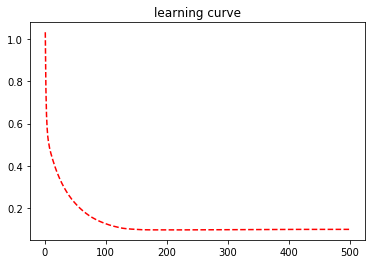

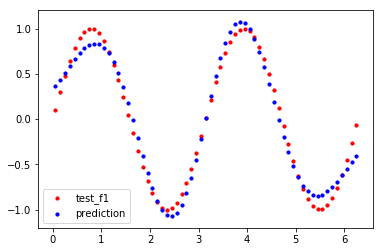

error: 0.09966890664169675


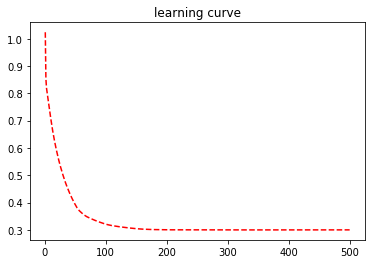

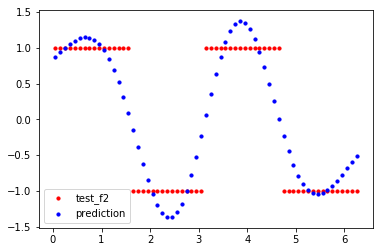

error: 0.2997619889616601


In [3]:


def RBF(x, mu, var):
    q = -( (x-mu)**2 )/ (2*var)
    return np.exp (q)

def compute_RBF_matrix (train_in, mu, var):
    
    how_many_data_points = len (train_in) # =63
    how_many_RBFunits =len (mu)
    phi=np.zeros( (how_many_data_points, how_many_RBFunits) )

    for i in range (0, how_many_data_points ):
        for j in range (0, how_many_RBFunits):
            phi[i][j] = RBF(train_in[i], mu[j], var[j])
    
    
    return phi

def predict (test_in, w,  mu, var ):
    phi_test = compute_RBF_matrix (test_in, mu, var)
    prediction = w.dot(phi_test.T)
    return prediction




def RBFlearning_batch_withoutCL_1D (train_in, train_out, test_in, test_out, 
                                  label_test_out, num_mu, mu, var, epoch, learning_rate ):
    error_list = []
    w = np.array([1 for i in range (0, len (mu))])
    for i in range(epoch):
        RBF_matrix = compute_RBF_matrix (train_in, mu, var)
        calculated_target = np.dot(RBF_matrix, w)    #changed from w.dot(pattern)
        diff = train_out - calculated_target    #(abs(calculated_target-target)) 
        delta_w = learning_rate * (diff.dot(RBF_matrix)) # pattern.T
        w = w + delta_w
        
        pred = predict (test_in, w, mu, var ) # predict_seq (test_in, w,  mu, var )
        e = absolute_residual_error(pred, test_out, test_in)  # absolute_residual_error(prediction, target, data_input)  
        error_list.append(e)
        
    draw_learning_curve(error_list)
    draw_2_scatters (test_in,  
                     test_out, 'r', label_test_out, 
                     pred, 'b', 'prediction')
    print ("error:", error_list[-1])
    
    return pred, error_list

learning_rate = 0.01
epoch = 500 #1000
num_mu = 5
mu_step = (2*pi) / num_mu
mu = np.arange (0, 2*pi, mu_step)          
var = [0.695 for i in range (0, len (mu))] 


pred, error = RBFlearning_batch_withoutCL_1D (train_in, train_f1, test_in, test_f1, 
                                            "test_f1", num_mu, mu, var, epoch, learning_rate )

pred, error = RBFlearning_batch_withoutCL_1D (train_in, train_f2, test_in, test_f2, 
                                            "test_f2", num_mu, mu, var, epoch, learning_rate )

## 3.2

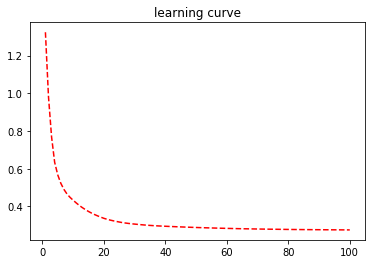

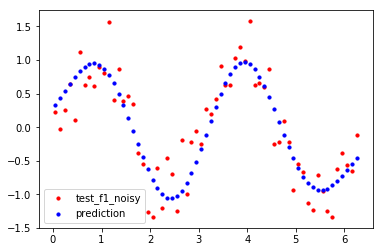

error: 0.2753123313358379


In [4]:
learning_rate = 0.01
epoch = 100 #1000
num_mu = 8
mu_step = (2*pi) / num_mu
mu = np.arange (0, 2*pi, mu_step)          
var = [0.4 for i in range (0, len (mu))] 
 
pred, error = RBFlearning_batch_withoutCL_1D (train_in, train_f1_noisy, test_in, test_f1_noisy, 
                                            "test_f1_noisy", num_mu, mu, var, epoch, learning_rate )

# pred, error = RBFlearning_batch_withoutCL_1D (train_in, train_f1, test_in, test_f1, 
#                                             "test_f1", num_mu, mu, var, epoch, learning_rate )

In [5]:
def compute_RBF_matrix_seq (x, mu, var): # x: an input data point
    how_many_RBFunits =len (mu) 
    phi=np.zeros(how_many_RBFunits)
    for k in range (0, how_many_RBFunits):
        phi[k] = RBF(x, mu[k], var[k])
    return phi

def predict_seq (test_in, w,  mu, var ):
    phi_test = compute_RBF_matrix (test_in, mu, var)
    prediction = w.dot(phi_test.T)
    return prediction

def RBFlearning_seq_withoutCL_1D (train_in, train_out, test_in, test_out, 
                                  label_test_out, num_mu, mu, var, epoch, learning_rate ):
    error_list=[]
    w = np.array([1 for i in range (0, len (mu))]) 
    for ep in range(0, epoch): 
        for i in range(len(train_in)):
            oneDataPoint = train_in[i]
            RBF_matrix = compute_RBF_matrix_seq (oneDataPoint, mu, var)                 
            calculated_target = np.dot(RBF_matrix.T, w)   
            error = train_out[i] - calculated_target
            delta_w = learning_rate * (error*(RBF_matrix.T)) 
            w = w + delta_w

        pred = predict_seq (test_in, w, mu, var ) # predict_seq (test_in, w,  mu, var )
        e = absolute_residual_error(pred, test_out, test_in)  # absolute_residual_error(prediction, target, data_input)  
        error_list.append(e)
    #draw_learning_curve(error_list)
    #draw_2_scatters (test_in,   test_out, 'r', label_test_out,  pred, 'b', 'prediction')
    #print ("error:", error_list[-1])
    
    return pred, error_list

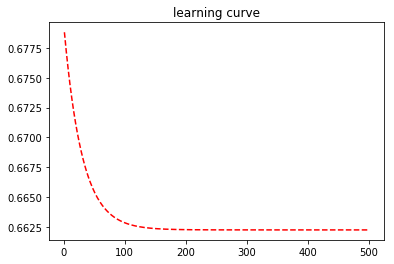

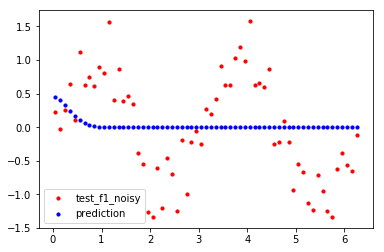

error: 0.6622425257805605


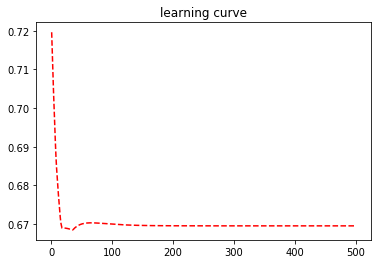

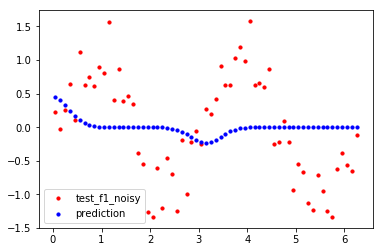

error: 0.6694884802927991


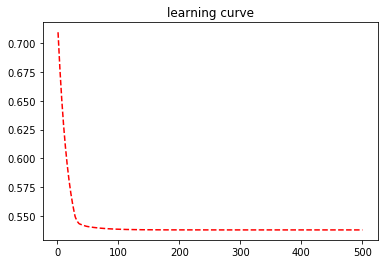

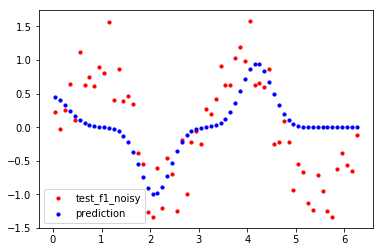

error: 0.5378069497340988


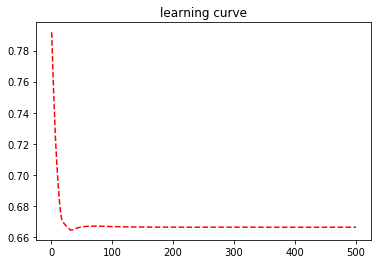

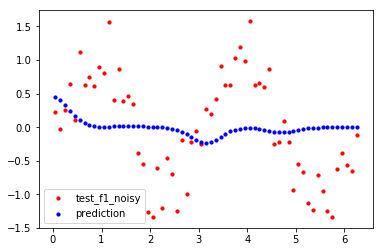

error: 0.6661656996640685


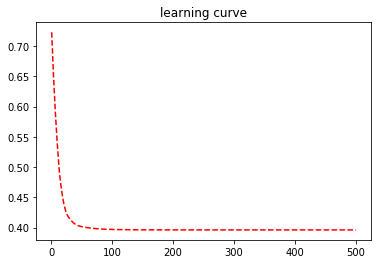

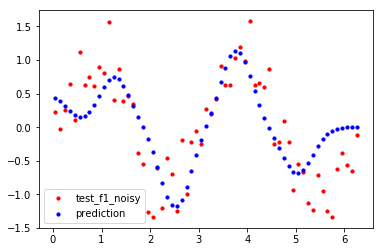

error: 0.3961925526781851


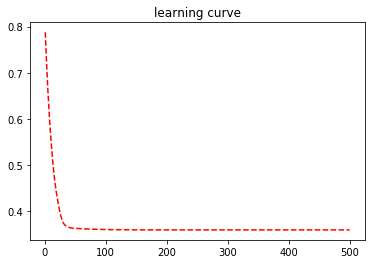

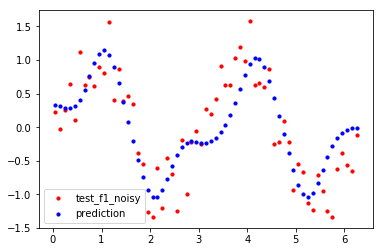

error: 0.3600516506968642


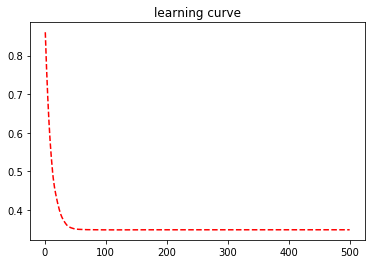

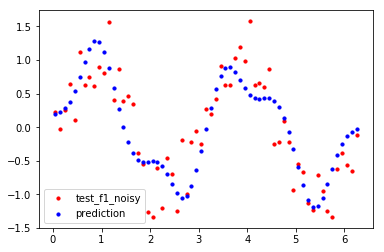

error: 0.3488766672394384


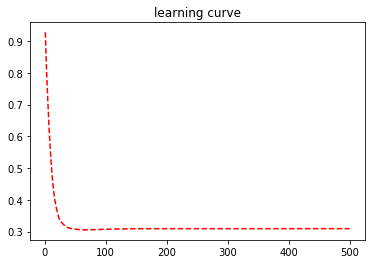

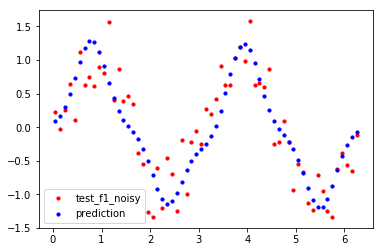

error: 0.3094518102061019


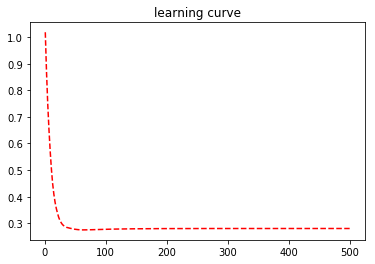

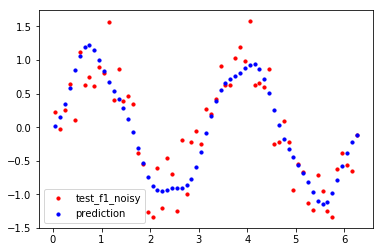

error: 0.28034119024876203


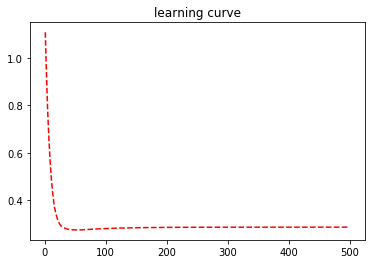

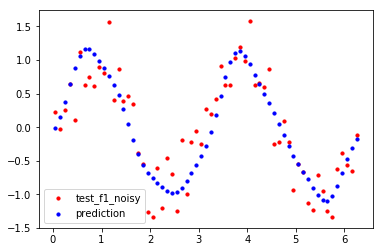

error: 0.2868028969553012


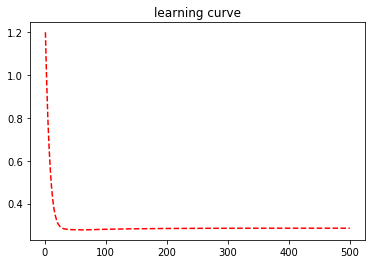

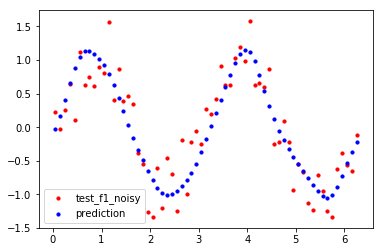

error: 0.28554895392284596


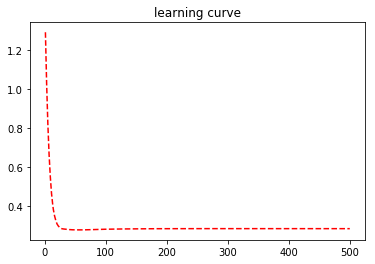

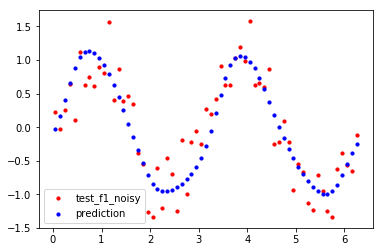

error: 0.2862060543340721


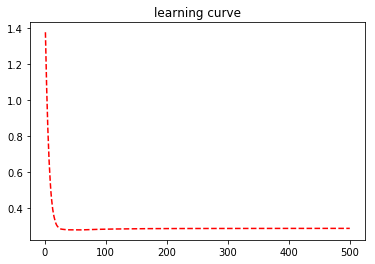

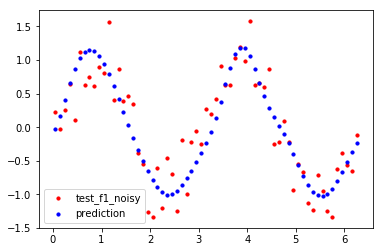

error: 0.2882755463612321


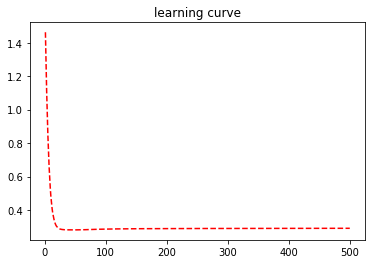

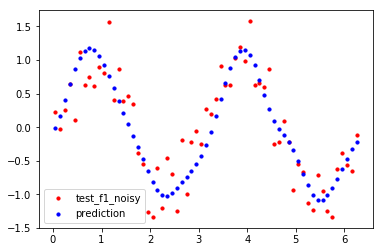

error: 0.2906431758728251


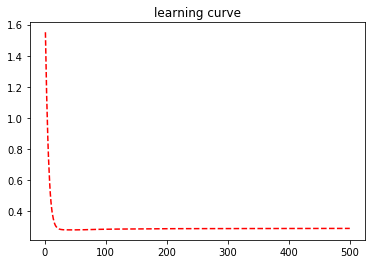

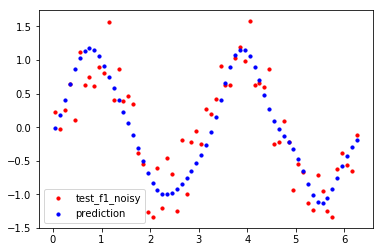

error: 0.290022693582815


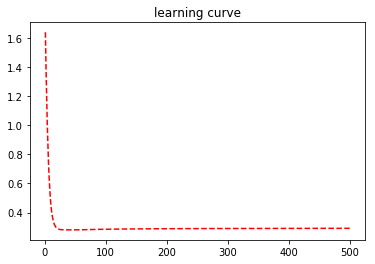

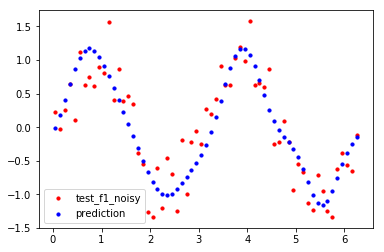

error: 0.29164412752066005


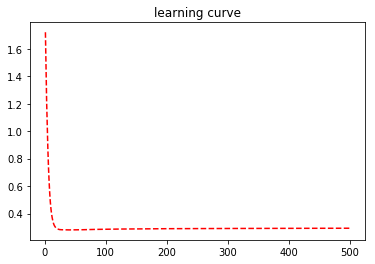

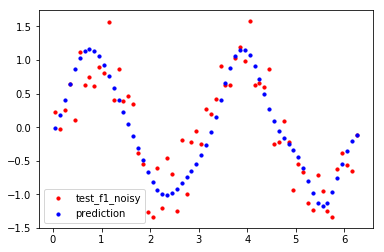

error: 0.2931222551974268


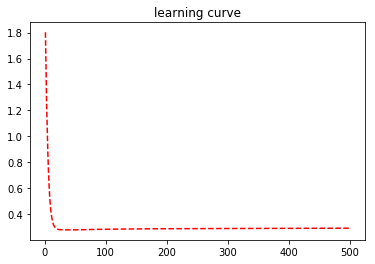

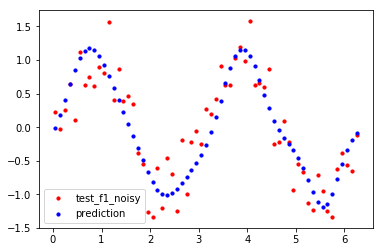

error: 0.2943550312568332


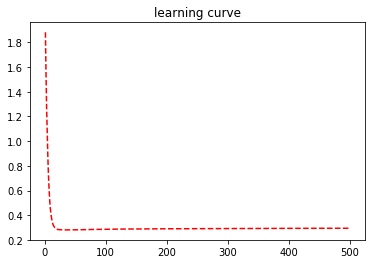

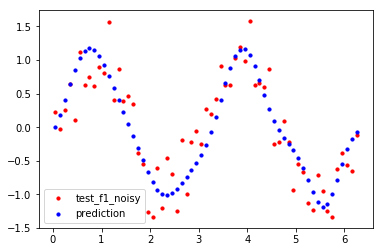

error: 0.2946792708286951


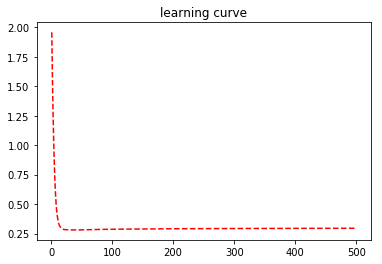

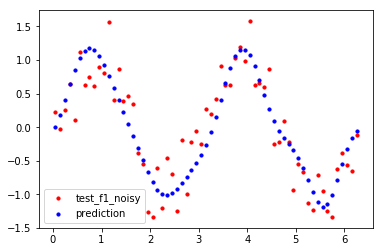

error: 0.29536723654008123


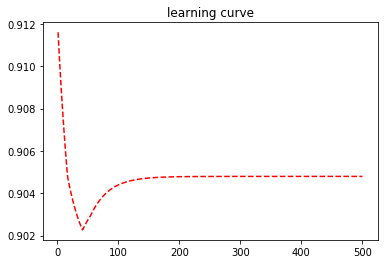

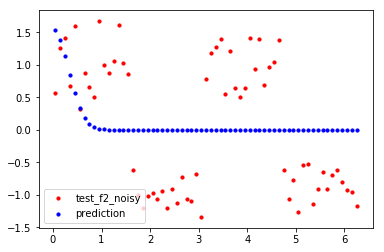

error: 0.9047976293106651


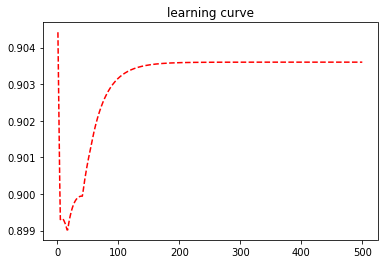

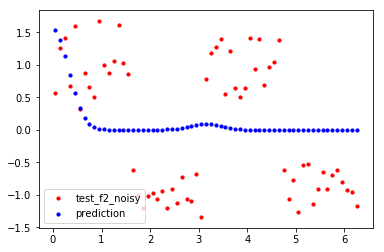

error: 0.9036008065730272


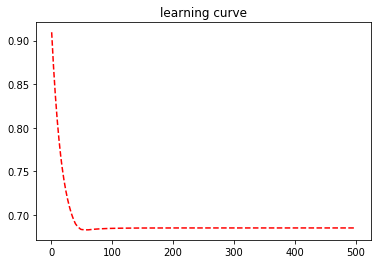

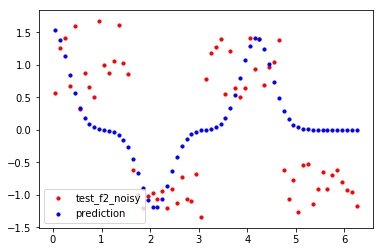

error: 0.6853503849768655


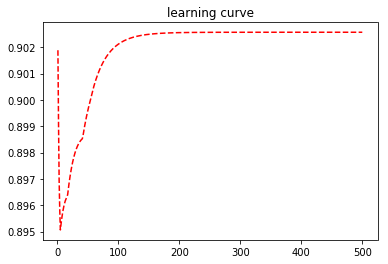

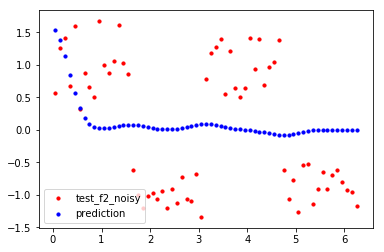

error: 0.9025712215962727


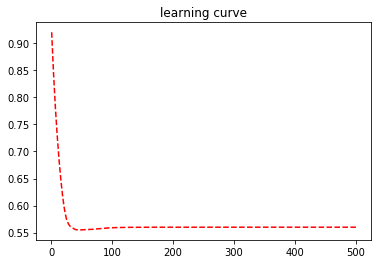

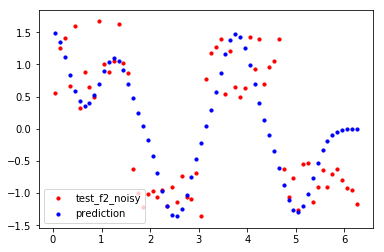

error: 0.5600403593128707


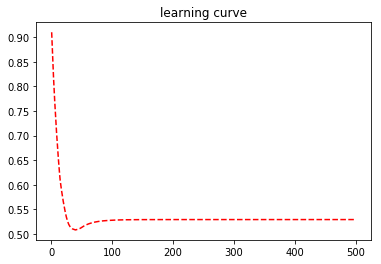

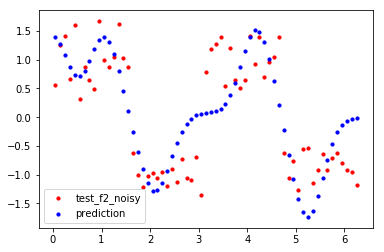

error: 0.5294518496599318


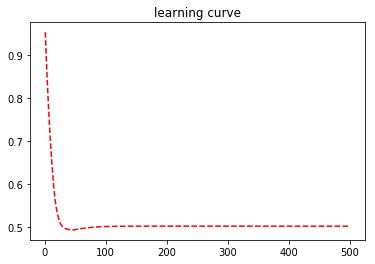

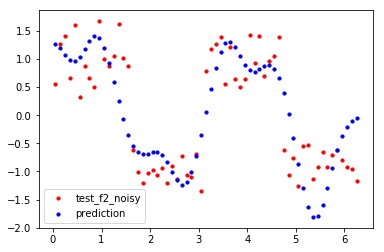

error: 0.5022899703291024


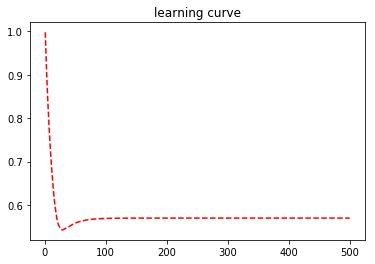

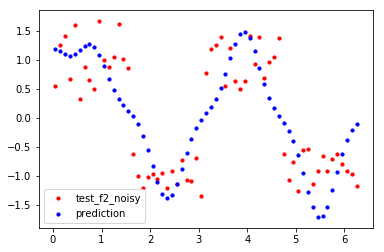

error: 0.5699676920723334


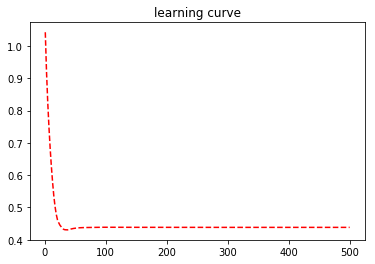

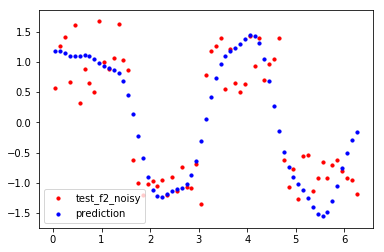

error: 0.43843810840972125


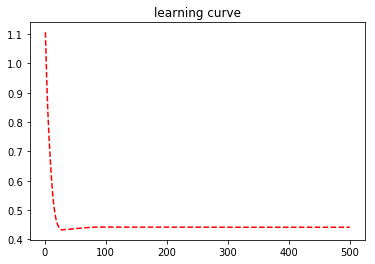

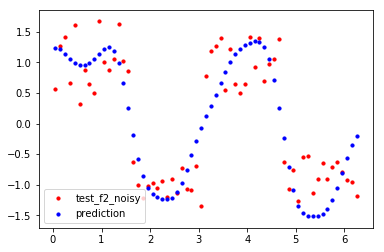

error: 0.44170416119344647


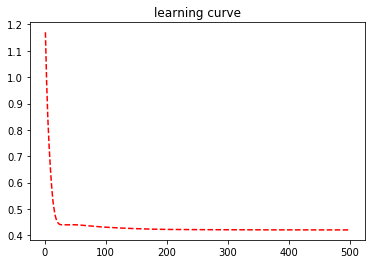

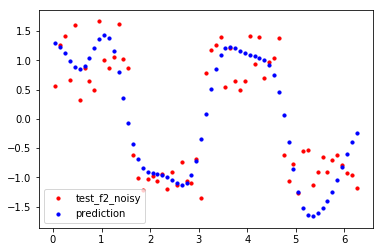

error: 0.42074919261356625


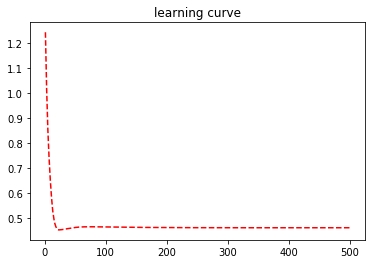

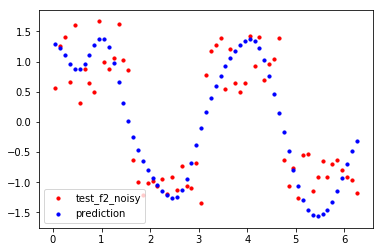

error: 0.4609981237119591


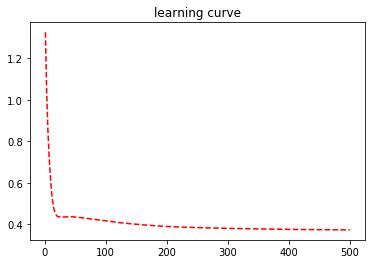

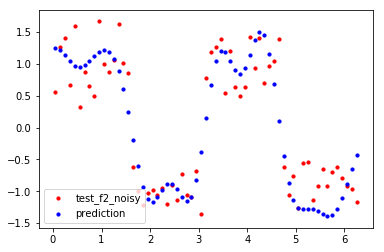

error: 0.3725003297990905


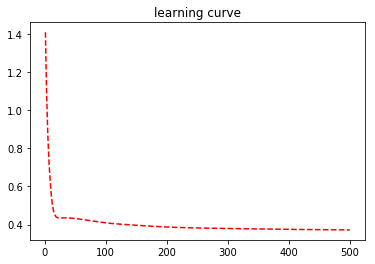

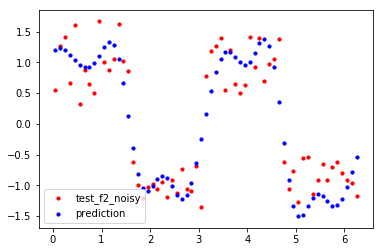

error: 0.3717216496288292


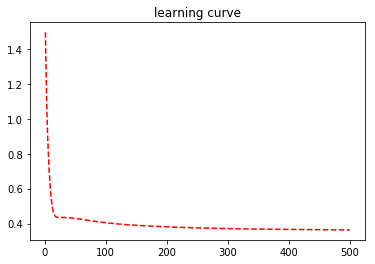

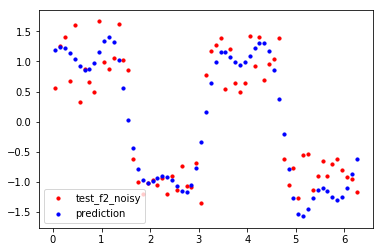

error: 0.36355910822478493


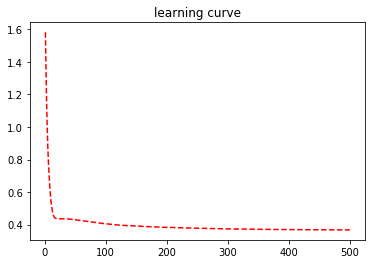

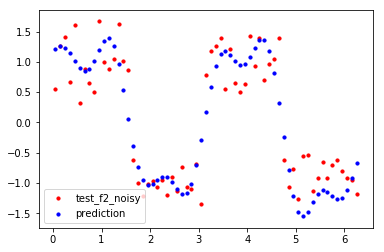

error: 0.36771562167478133


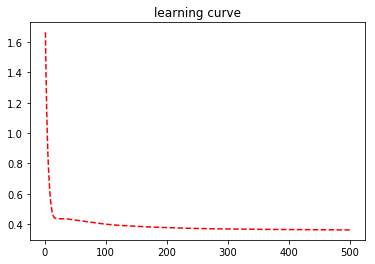

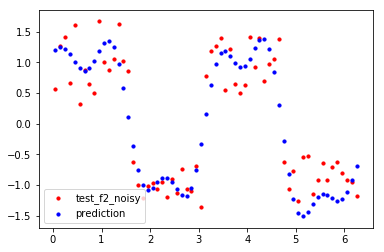

error: 0.36096564123506375


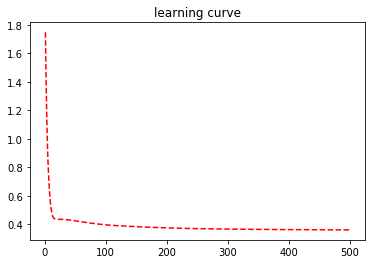

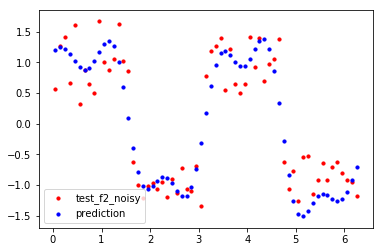

error: 0.36026131910981896


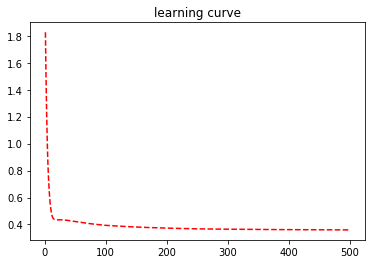

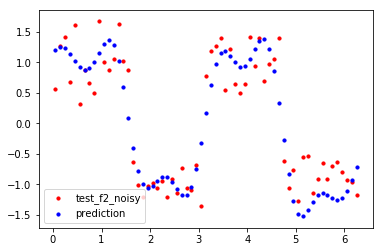

error: 0.35952515405350116


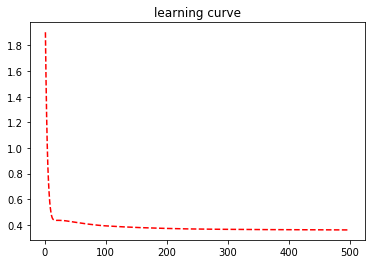

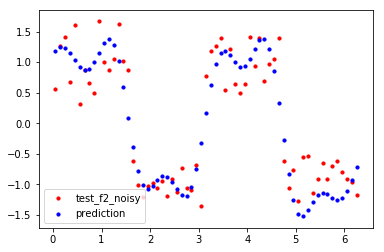

error: 0.3600233497844424
f1_error_list_batch [0.6622425257805605, 0.6694884802927991, 0.5378069497340988, 0.6661656996640685, 0.3961925526781851, 0.3600516506968642, 0.3488766672394384, 0.3094518102061019, 0.28034119024876203, 0.2868028969553012, 0.28554895392284596, 0.2862060543340721, 0.2882755463612321, 0.2906431758728251, 0.290022693582815, 0.29164412752066005, 0.2931222551974268, 0.2943550312568332, 0.2946792708286951, 0.29536723654008123]
f2_error_list_batch [0.9047976293106651, 0.9036008065730272, 0.6853503849768655, 0.9025712215962727, 0.5600403593128707, 0.5294518496599318, 0.5022899703291024, 0.5699676920723334, 0.43843810840972125, 0.44170416119344647, 0.42074919261356625, 0.4609981237119591, 0.3725003297990905, 0.3717216496288292, 0.36355910822478493, 0.36771562167478133, 0.36096564123506375, 0.36026131910981896, 0.35952515405350116, 0.3600233497844424]


In [19]:
#testing number of nodes

f1_error_list_seq = []
f1_error_list_batch = []
f2_error_list_seq = []
f2_error_list_batch = []

learning_rate = 0.01
epoch = 500 
# num_mu = 8
# mu_step = (2*pi) / num_mu
# mu = np.arange (0, 2*pi, mu_step)          
# var = [0.1 for i in range (0, len (mu))] 

# for m in range(1,21):
#     num_mu = m
#     mu_step = (2*pi) / num_mu
#     mu = np.arange (0, 2*pi, mu_step) 
#     var = [0.1 for i in range (0, len (mu))] 
    
#     pred, error = RBFlearning_seq_withoutCL_1D (train_in, train_f1_noisy, test_in, test_f1_noisy, 
#                                             "test_f1_noisy", num_mu, mu, var, epoch, learning_rate )
#     f1_error_list_seq.append(error[-1])
    
for m in range(1,21):
    num_mu = m
    mu_step = (2*pi) / num_mu
    mu = np.arange (0, 2*pi, mu_step) 
    var = [0.1 for i in range (0, len (mu))] 
    
    pred, error = RBFlearning_batch_withoutCL_1D (train_in, train_f1_noisy, test_in, test_f1_noisy, 
                                            "test_f1_noisy", num_mu, mu, var, epoch, learning_rate )
    f1_error_list_batch.append(error[-1])

# for m in range(1,21):
#     num_mu = m
#     mu_step = (2*pi) / num_mu
#     mu = np.arange (0, 2*pi, mu_step) 
#     var = [0.1 for i in range (0, len (mu))] 
    
#     pred, error = RBFlearning_seq_withoutCL_1D (train_in, train_f2_noisy, test_in, test_f2_noisy, 
#                                             "test_f2_noisy", num_mu, mu, var, epoch, learning_rate )
#     f2_error_list_seq.append(error[-1])
    
for m in range(1,21):
    num_mu = m
    mu_step = (2*pi) / num_mu
    mu = np.arange (0, 2*pi, mu_step) 
    var = [0.1 for i in range (0, len (mu))] 
    
    pred, error = RBFlearning_batch_withoutCL_1D (train_in, train_f2_noisy, test_in, test_f2_noisy, 
                                            "test_f2_noisy", num_mu, mu, var, epoch, learning_rate )
    f2_error_list_batch.append(error[-1])


#print("f1_error_list_seq",f1_error_list_seq)
print("f1_error_list_batch",f1_error_list_batch)
#print("f2_error_list_seq",f2_error_list_seq)
print("f2_error_list_batch",f2_error_list_batch)

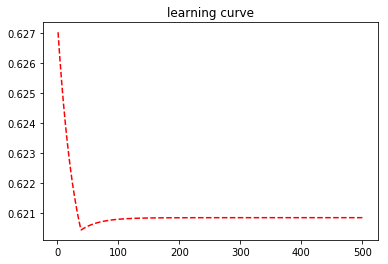

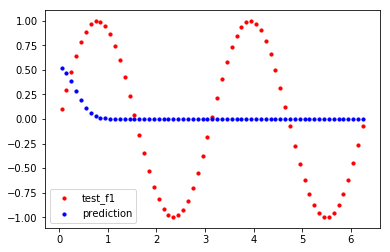

error: 0.6208368866520897


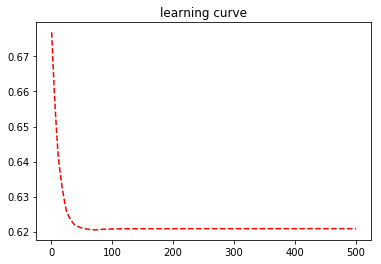

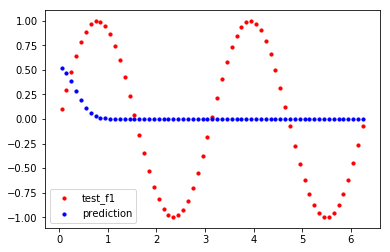

error: 0.6208368866522196


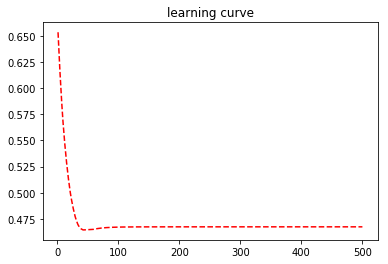

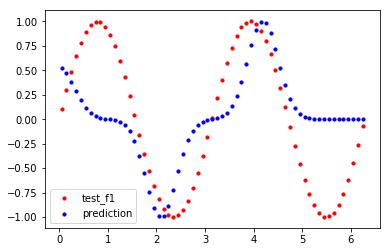

error: 0.4673504785795306


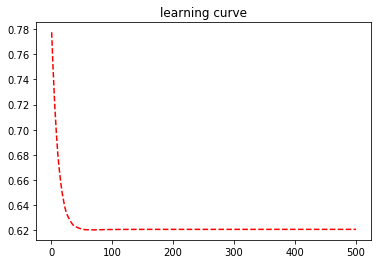

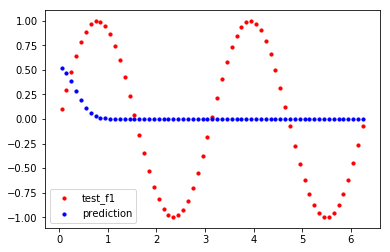

error: 0.6208470799640909


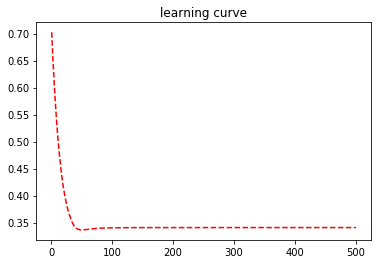

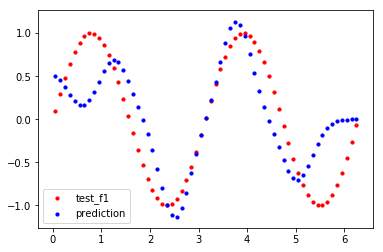

error: 0.3407269067149933


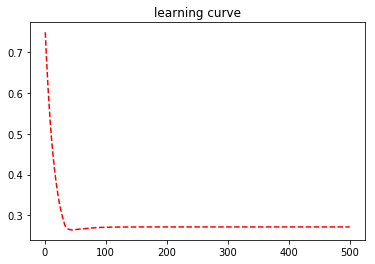

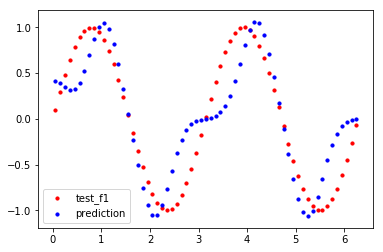

error: 0.2713714217554595


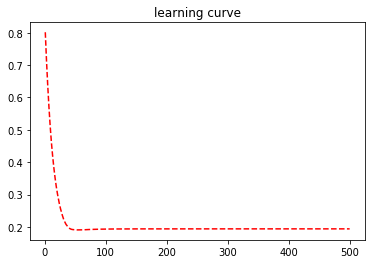

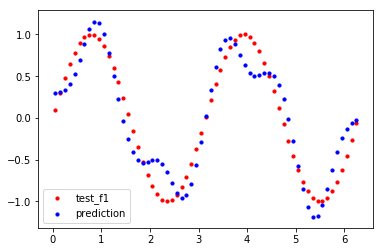

error: 0.1939715140436085


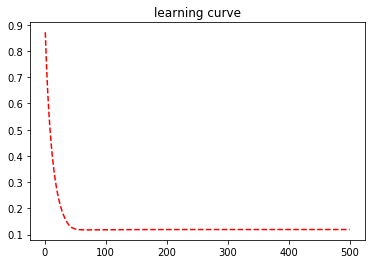

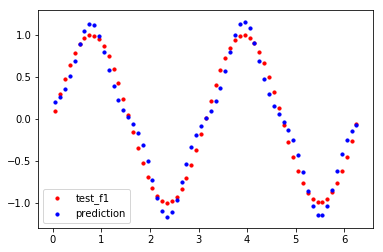

error: 0.11943780727296192


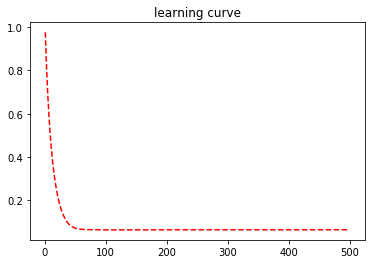

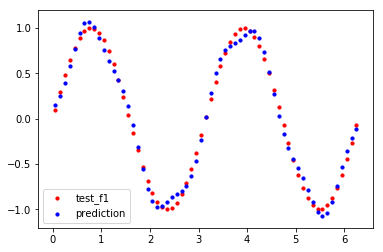

error: 0.06474944312393592


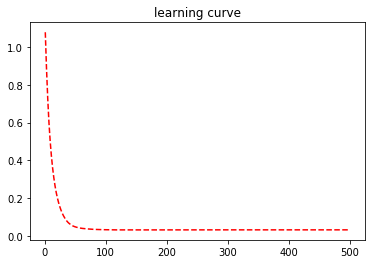

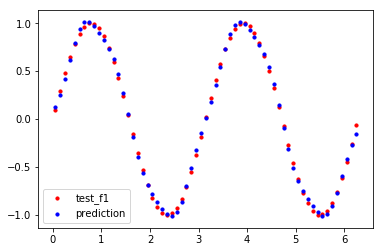

error: 0.03200067068327736


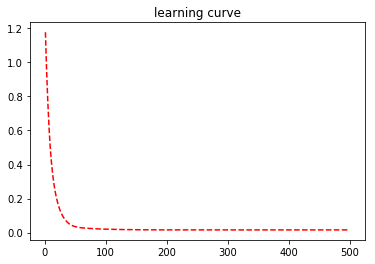

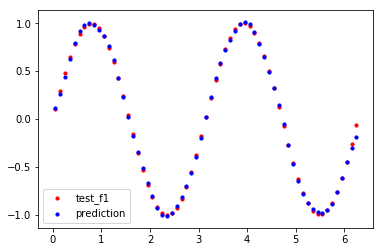

error: 0.016147740546418175


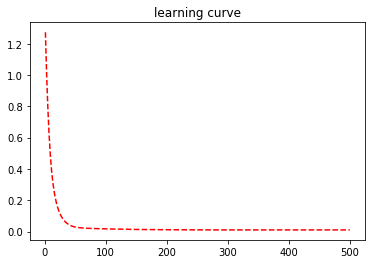

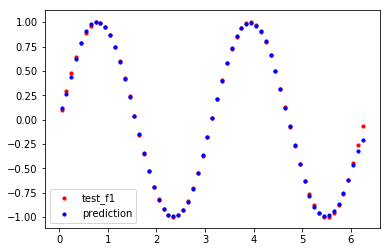

error: 0.010916033926021496


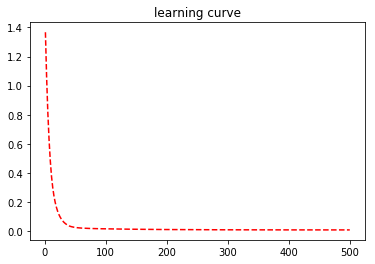

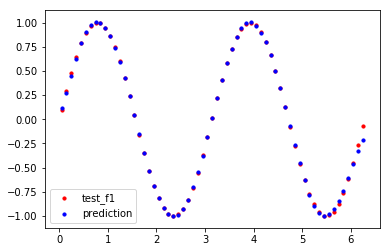

error: 0.009871140220598781


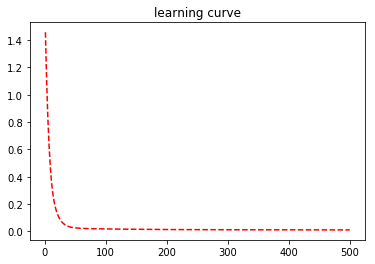

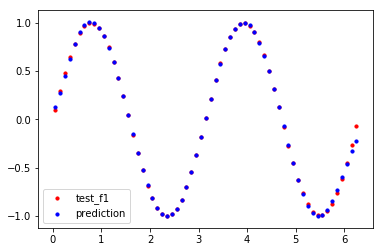

error: 0.01027390685781542


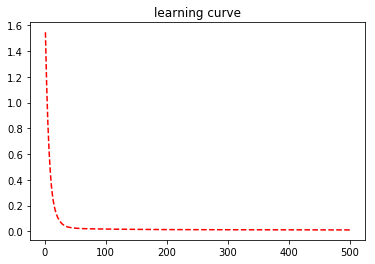

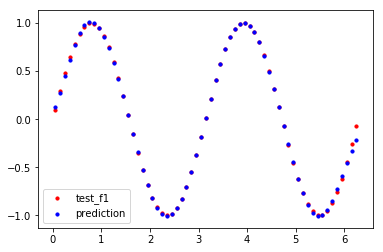

error: 0.010699574524929688


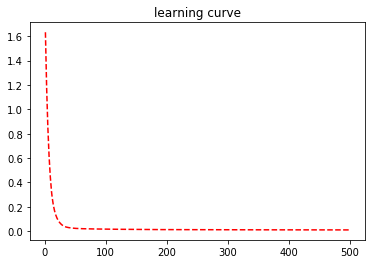

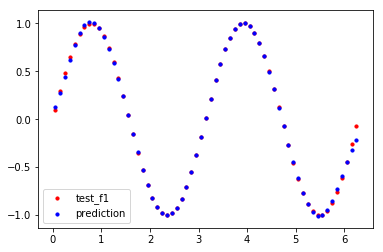

error: 0.01073725545721679


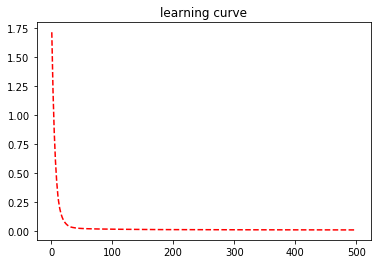

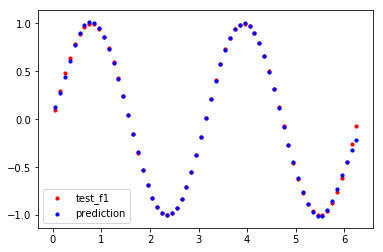

error: 0.010686287651654691


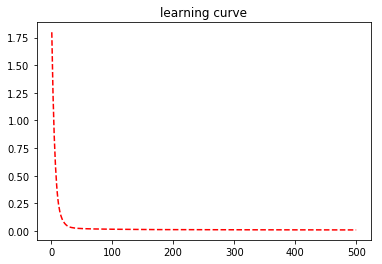

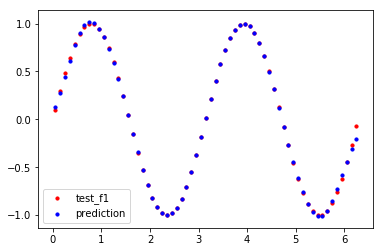

error: 0.010560341556503403


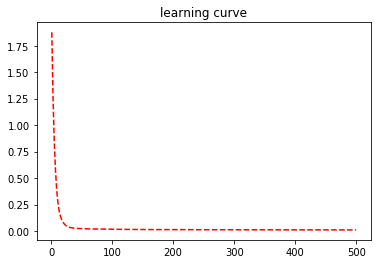

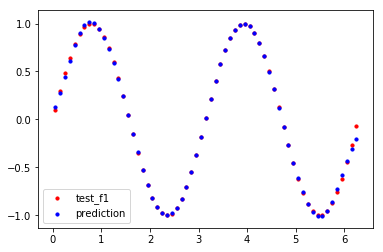

error: 0.010416105973315918


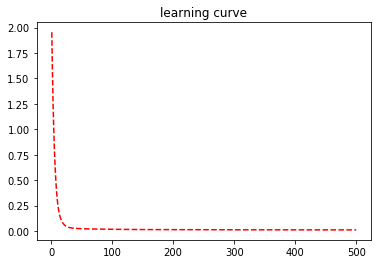

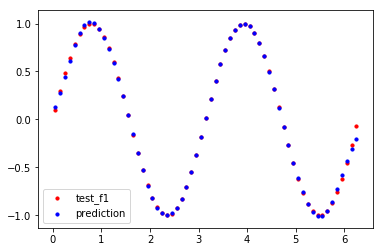

error: 0.010280840385347744


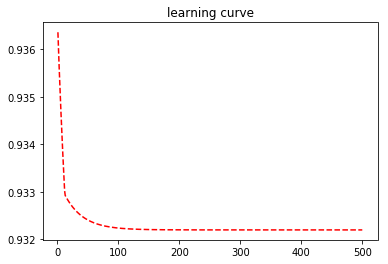

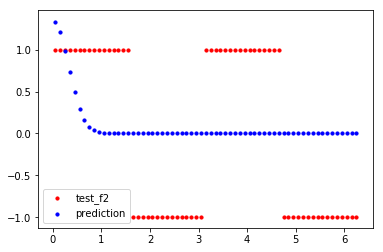

error: 0.9321965676102699


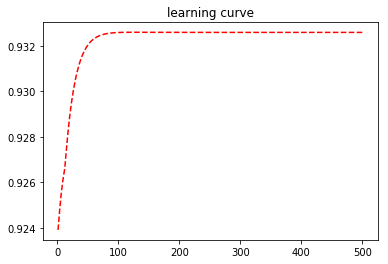

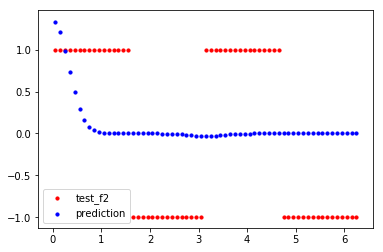

error: 0.9325948119060652


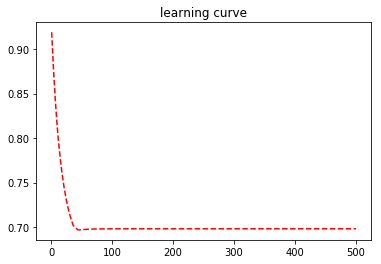

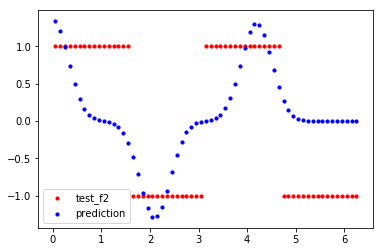

error: 0.6979912327095958


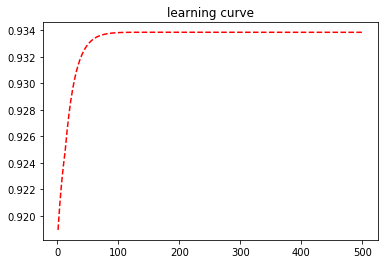

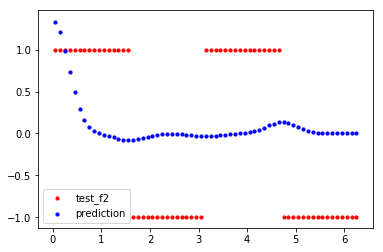

error: 0.9338445270795696


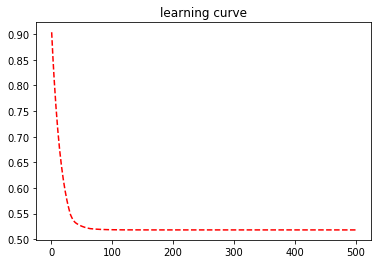

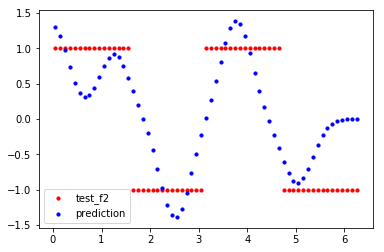

error: 0.5181533867590683


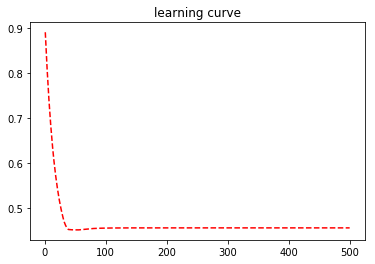

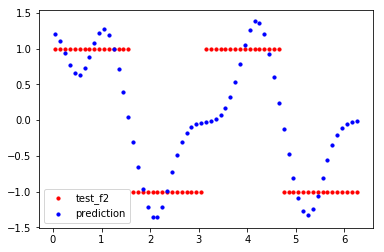

error: 0.45590141803400036


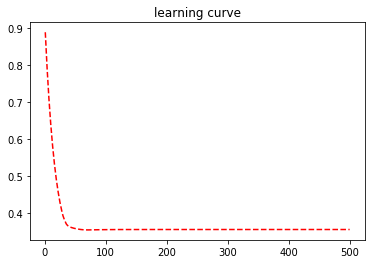

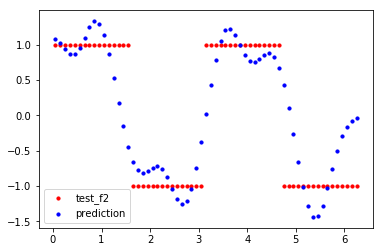

error: 0.354743467849443


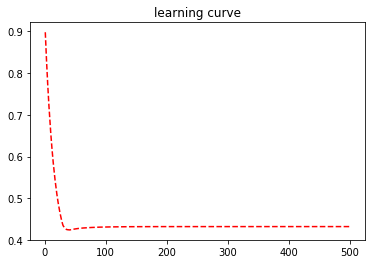

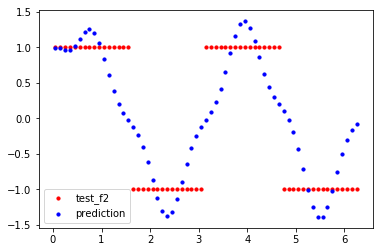

error: 0.4325601487116023


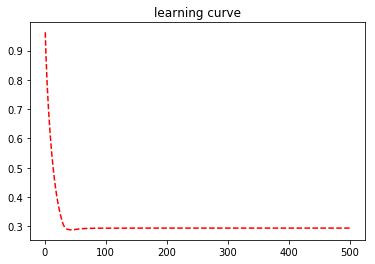

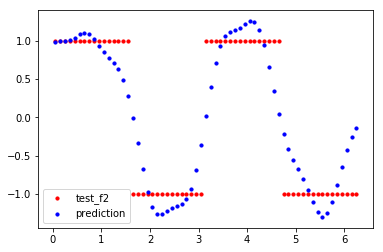

error: 0.29414998600966613


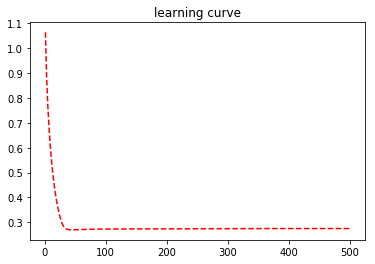

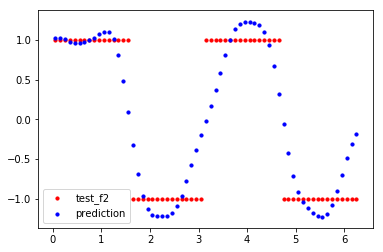

error: 0.27502888220743993


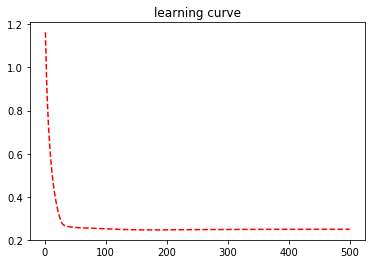

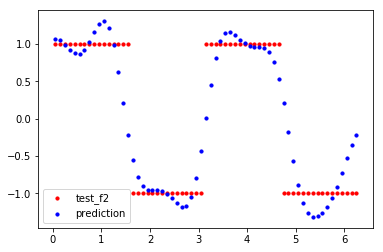

error: 0.250709963091878


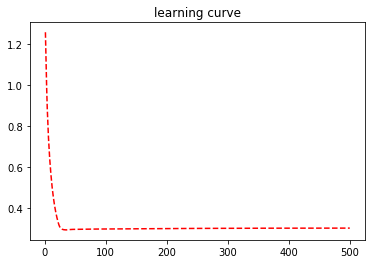

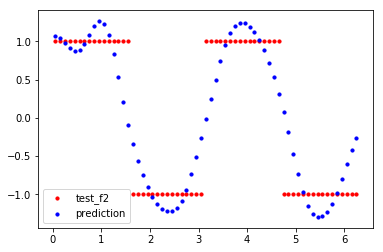

error: 0.3027920346052723


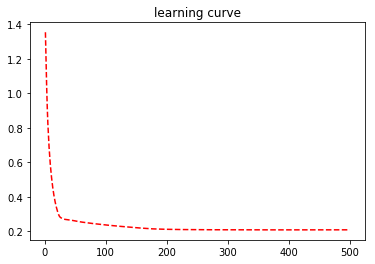

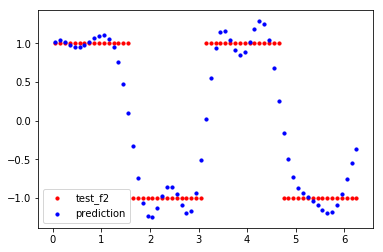

error: 0.2090901080252689


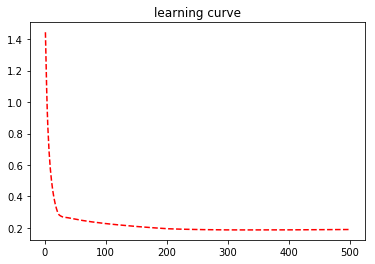

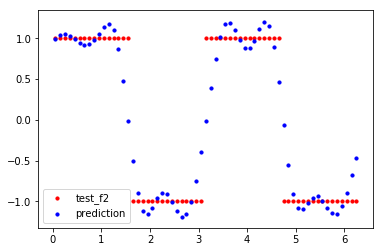

error: 0.19007884194506425


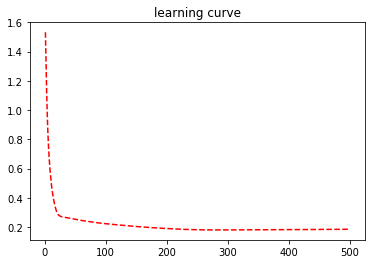

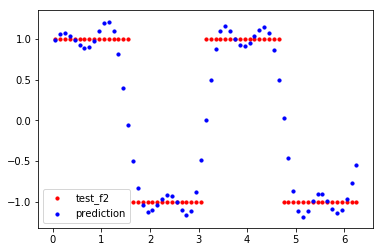

error: 0.18487292048948273


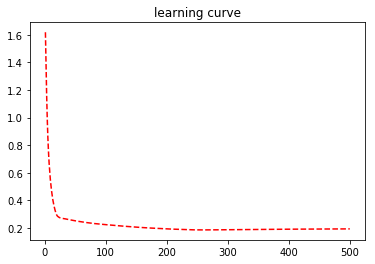

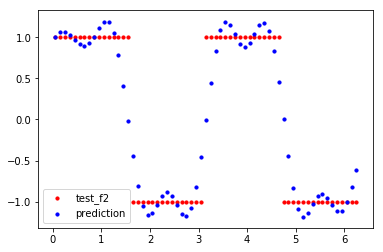

error: 0.19366650936593305


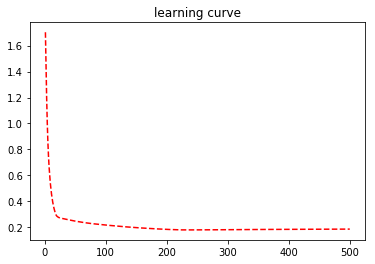

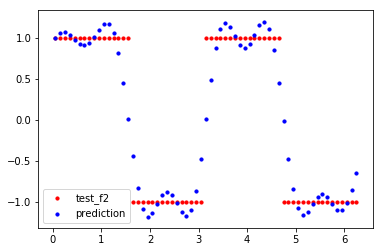

error: 0.1860099963107355


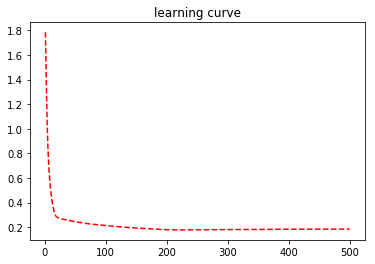

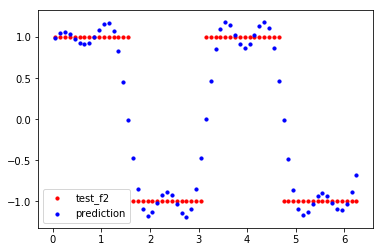

error: 0.18493322258686984


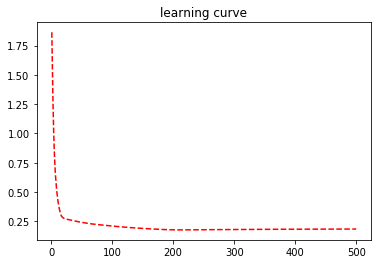

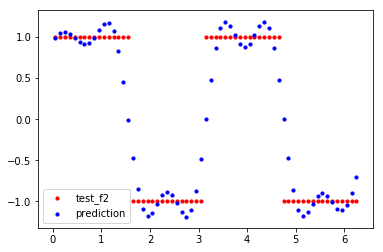

error: 0.18463954889221623


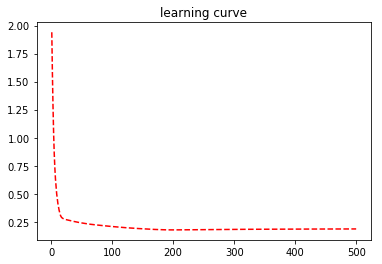

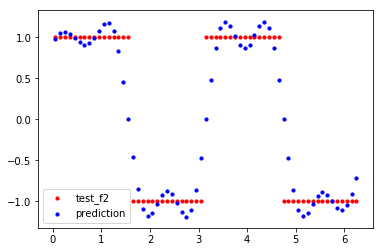

error: 0.1857701893669642
f1_error_list_batch_clean [0.6208368866520897, 0.6208368866522196, 0.4673504785795306, 0.6208470799640909, 0.3407269067149933, 0.2713714217554595, 0.1939715140436085, 0.11943780727296192, 0.06474944312393592, 0.03200067068327736, 0.016147740546418175, 0.010916033926021496, 0.009871140220598781, 0.01027390685781542, 0.010699574524929688, 0.01073725545721679, 0.010686287651654691, 0.010560341556503403, 0.010416105973315918, 0.010280840385347744]
f2_error_list_batch_clean [0.9321965676102699, 0.9325948119060652, 0.6979912327095958, 0.9338445270795696, 0.5181533867590683, 0.45590141803400036, 0.354743467849443, 0.4325601487116023, 0.29414998600966613, 0.27502888220743993, 0.250709963091878, 0.3027920346052723, 0.2090901080252689, 0.19007884194506425, 0.18487292048948273, 0.19366650936593305, 0.1860099963107355, 0.18493322258686984, 0.18463954889221623, 0.1857701893669642]


In [18]:
#testing number of nodes on clean dataset
#testing number of nodes

f1_error_list_seq_clean = []
f1_error_list_batch_clean = []
f2_error_list_seq_clean = []
f2_error_list_batch_clean = []

learning_rate = 0.01
epoch = 500 
# num_mu = 8
# mu_step = (2*pi) / num_mu
# mu = np.arange (0, 2*pi, mu_step)          
# var = [0.1 for i in range (0, len (mu))] 

# for m in range(1,21):
#     num_mu = m
#     mu_step = (2*pi) / num_mu
#     mu = np.arange (0, 2*pi, mu_step) 
#     var = [0.1 for i in range (0, len (mu))] 
    
#     pred, error = RBFlearning_seq_withoutCL_1D (train_in, train_f1, test_in, test_f1, 
#                                             "test_f1", num_mu, mu, var, epoch, learning_rate )
#     f1_error_list_seq_clean.append(error[-1])
    
for m in range(1,21):
    num_mu = m
    mu_step = (2*pi) / num_mu
    mu = np.arange (0, 2*pi, mu_step) 
    var = [0.1 for i in range (0, len (mu))] 
    
    pred, error = RBFlearning_batch_withoutCL_1D (train_in, train_f1, test_in, test_f1, 
                                            "test_f1", num_mu, mu, var, epoch, learning_rate )
    f1_error_list_batch_clean.append(error[-1])

# for m in range(1,21):
#     num_mu = m
#     mu_step = (2*pi) / num_mu
#     mu = np.arange (0, 2*pi, mu_step) 
#     var = [0.1 for i in range (0, len (mu))] 
    
#     pred, error = RBFlearning_seq_withoutCL_1D (train_in, train_f2, test_in, test_f2, 
#                                             "test_f2", num_mu, mu, var, epoch, learning_rate )
#     f2_error_list_seq_clean.append(error[-1])
    
for m in range(1,21):
    num_mu = m
    mu_step = (2*pi) / num_mu
    mu = np.arange (0, 2*pi, mu_step) 
    var = [0.1 for i in range (0, len (mu))] 
    
    pred, error = RBFlearning_batch_withoutCL_1D (train_in, train_f2, test_in, test_f2, 
                                            "test_f2", num_mu, mu, var, epoch, learning_rate )
    f2_error_list_batch_clean.append(error[-1])


#print("f1_error_list_seq_clean",f1_error_list_seq_clean)
print("f1_error_list_batch_clean",f1_error_list_batch_clean)
#print("f2_error_list_seq_clean",f2_error_list_seq_clean)
print("f2_error_list_batch_clean",f2_error_list_batch_clean)

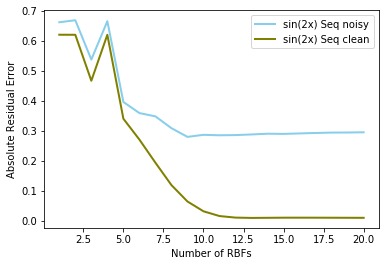

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
df=pd.DataFrame({'Number of RBFs': range(1,21), 'sin(2x) Seq noisy': f1_error_list_seq, 'sin(2x) Seq clean': f1_error_list_seq_clean})

# multiple line plot
plt.plot( 'Number of RBFs', 'sin(2x) Seq noisy', data=df, marker='', color='skyblue', linewidth=2)
plt.plot( 'Number of RBFs', 'sin(2x) Seq clean', data=df, marker='', color='olive', linewidth=2)
plt.xlabel("Number of RBFs")
plt.ylabel("Absolute Residual Error")
plt.legend()
plt.savefig('numberofrbfsf1.png')

In [1]:


# Data
df=pd.DataFrame({'Number of RBFs': range(1,21), 'sin(2x) Batch noisy': f1_error_list_batch, 'sin(2x) Batch clean': f1_error_list_batch_clean, 'square(2x) Batch noisy': f2_error_list_batch, 'square(2x) Batch clean': f2_error_list_batch_clean, 'sin(2x) perceptron': perc1, 'square(2x) perceptron': perc2})

# multiple line plot
plt.plot( 'Number of RBFs', 'sin(2x) Batch noisy', data=df, marker='', color='skyblue', linewidth=2)
plt.plot( 'Number of RBFs', 'sin(2x) Batch clean', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'Number of RBFs', 'square(2x) Batch noisy', data=df, marker='', color='red', linewidth=2)
plt.plot( 'Number of RBFs', 'square(2x) Batch clean', data=df, marker='', color='blue', linewidth=2)
plt.xlabel("Number of RBFs")
plt.ylabel("Absolute Residual Error")
plt.legend()
#plt.savefig('numberofrbfsbatch.png')

NameError: name 'pd' is not defined

In [ ]:
# Data
df=pd.DataFrame({'Number of RBFs': range(1,21), 'square(2x) Seq noisy': f2_error_list_seq, 'square(2x) Seq clean': f2_error_list_seq_clean})

# multiple line plot
plt.plot( 'Number of RBFs', 'square(2x) Seq noisy', data=df, marker='', color='skyblue', linewidth=2)
plt.plot( 'Number of RBFs', 'square(2x) Seq clean', data=df, marker='', color='olive', linewidth=2)
plt.xlabel("Number of RBFs")
plt.ylabel("Absolute Residual Error")
plt.legend()
#plt.savefig('numberofrbfsbatch.png')

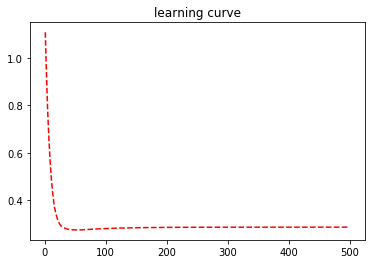

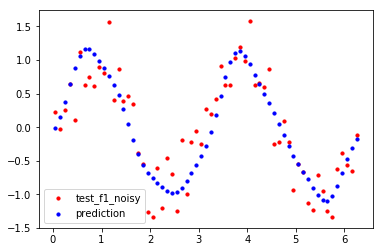

error: 0.2868028969553012


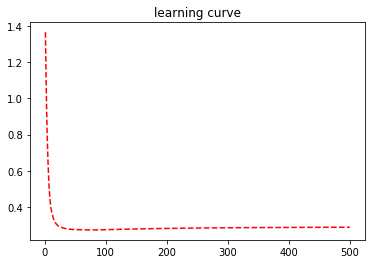

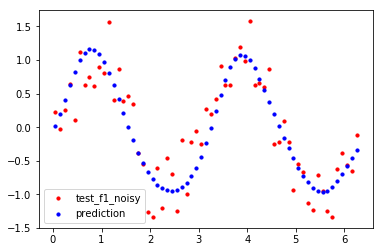

error: 0.2888119505457339


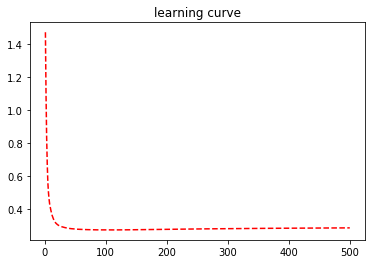

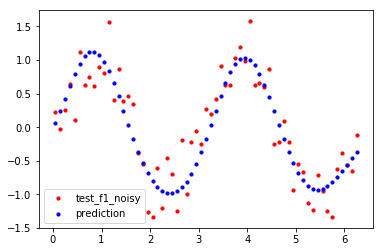

error: 0.2851844541187087


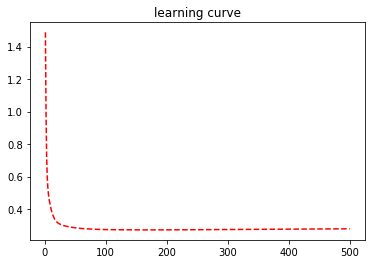

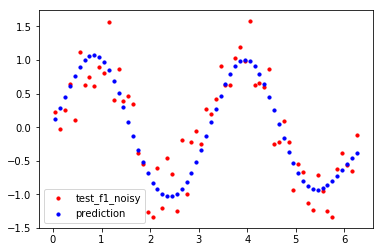

error: 0.27839343671279443


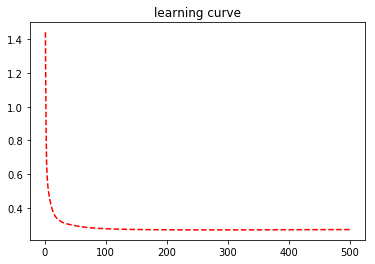

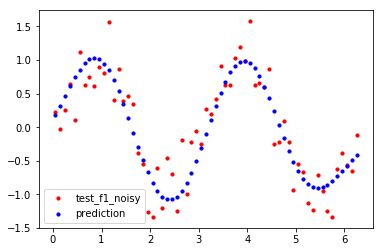

error: 0.27240216085067054


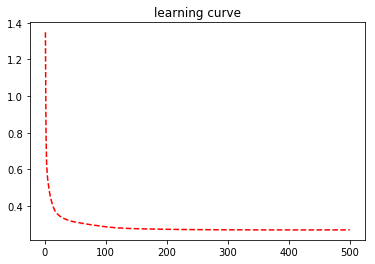

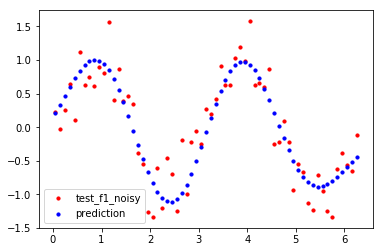

error: 0.2701063051526977


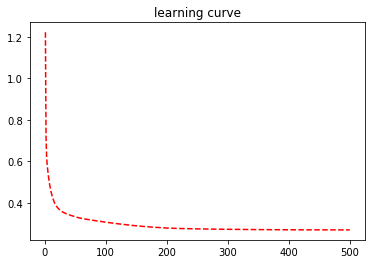

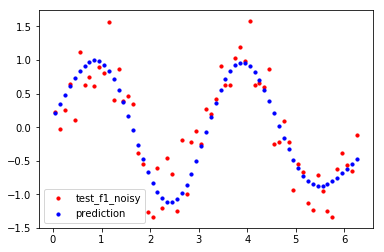

error: 0.2698266720455462


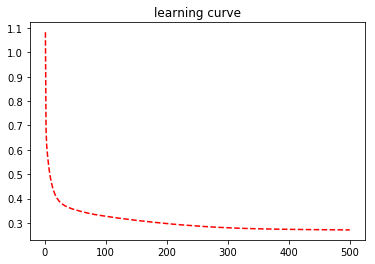

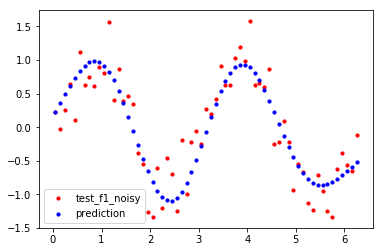

error: 0.2713052328859375


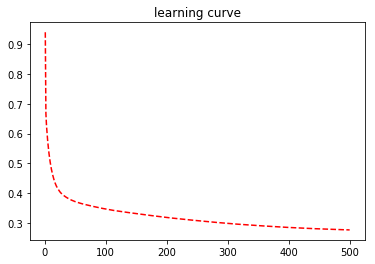

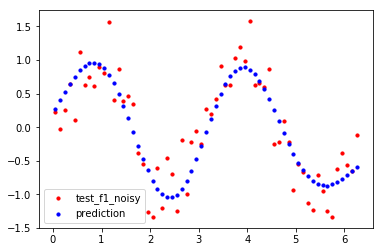

error: 0.27739205116015125


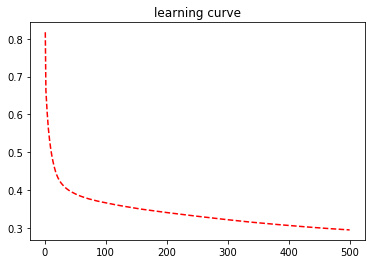

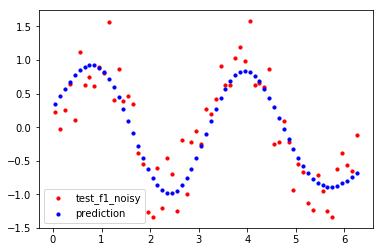

error: 0.29518918435049524


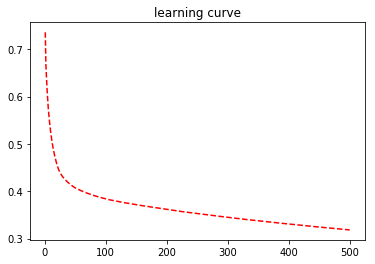

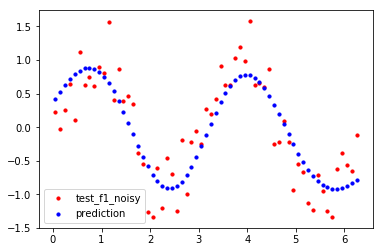

error: 0.31818181878322876


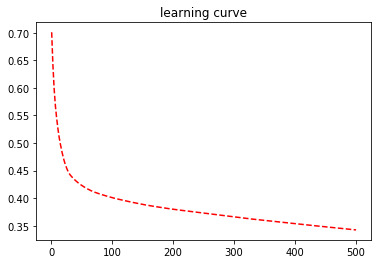

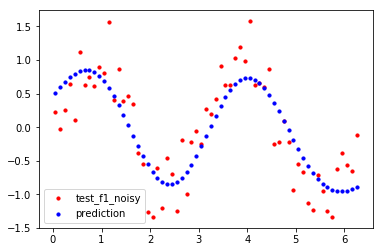

error: 0.34234451018023065


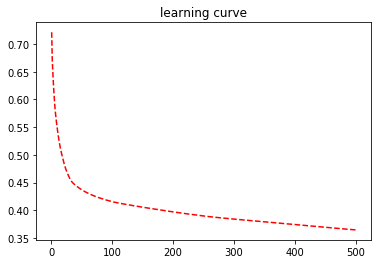

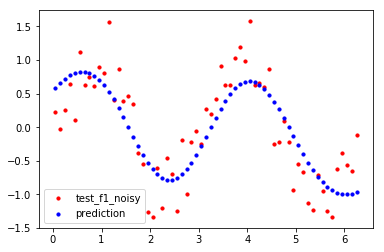

error: 0.3647628539567879


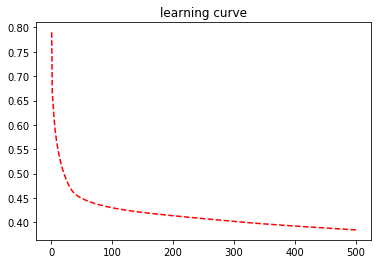

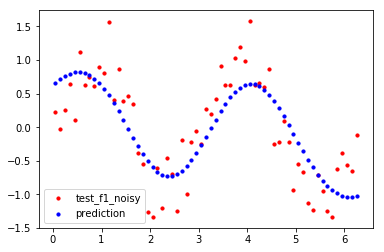

error: 0.3843395941955148


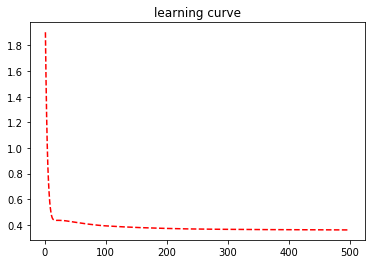

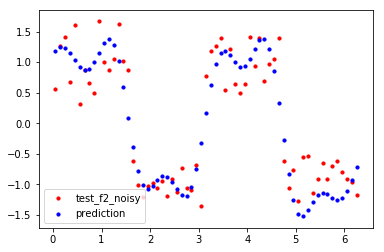

error: 0.3600233497844424


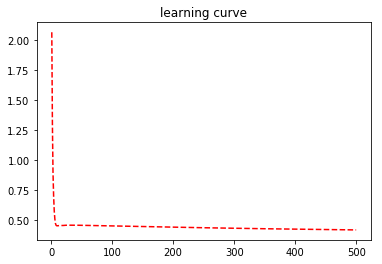

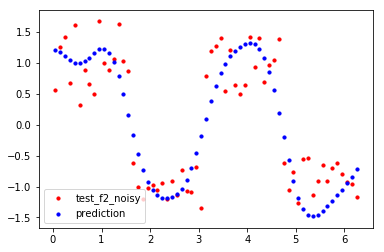

error: 0.418006506740599


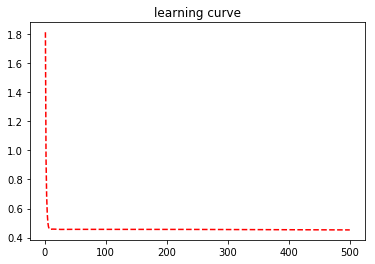

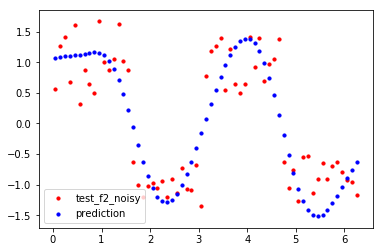

error: 0.45316508055354915


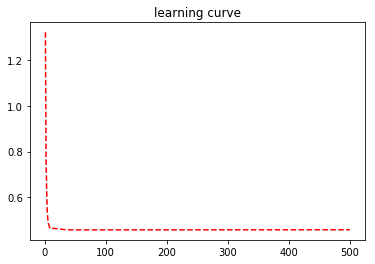

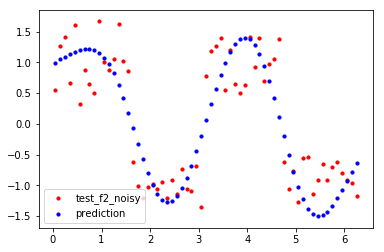

error: 0.45678018742622173


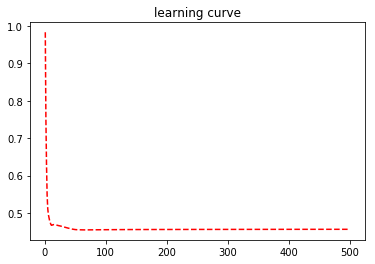

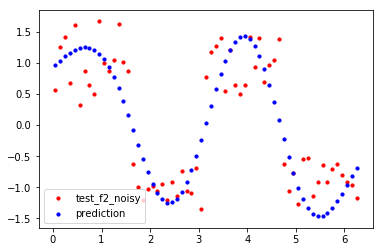

error: 0.45638238661969704


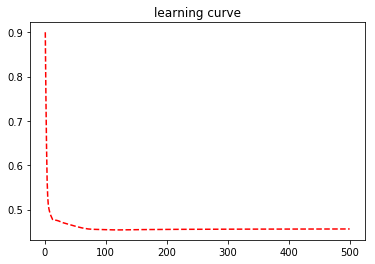

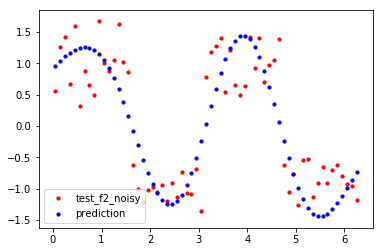

error: 0.4560975419967376


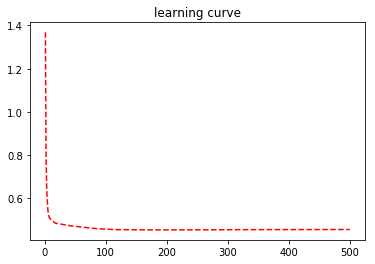

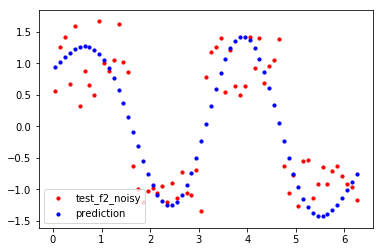

error: 0.4556888452612362


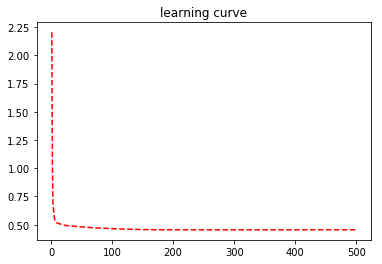

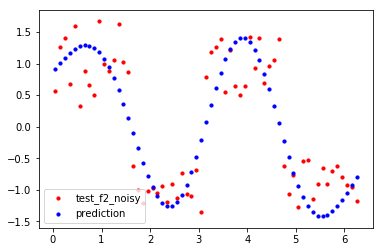

error: 0.4550203746254892


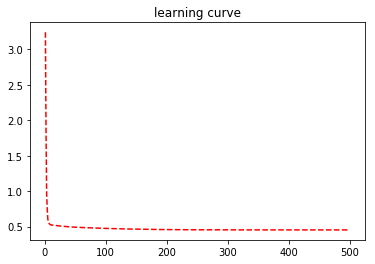

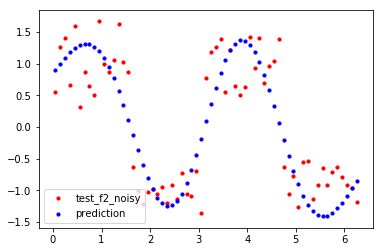

error: 0.4539782552994065


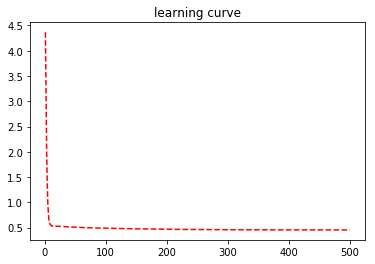

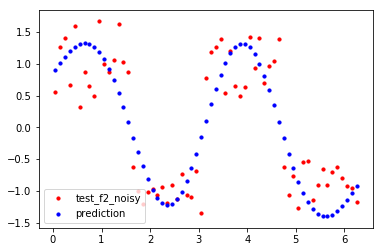

error: 0.4544482007895389


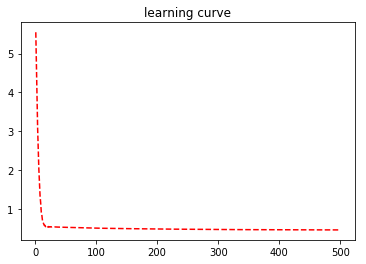

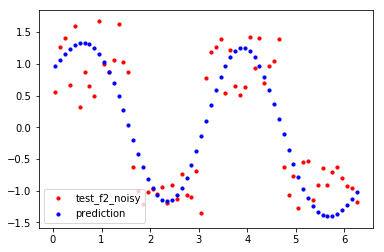

error: 0.45689661300046364


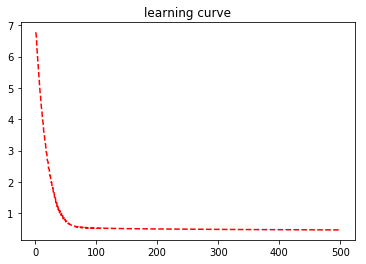

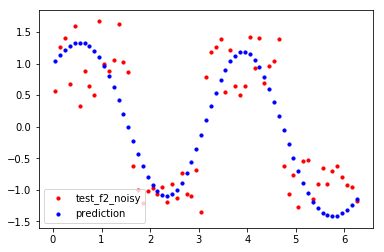

error: 0.4642192648981915


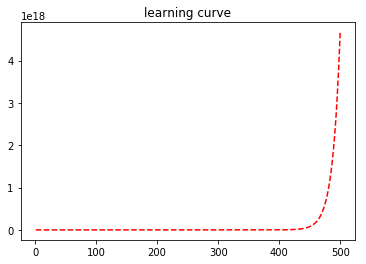

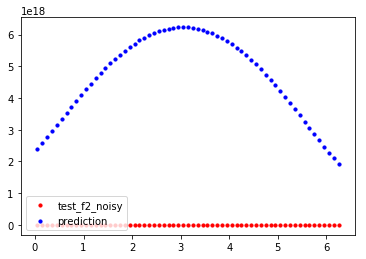

error: 4.669563327892567e+18


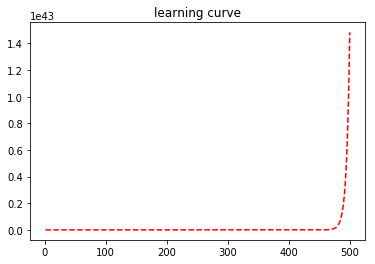

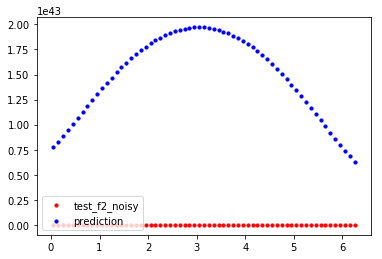

error: 1.4843174408565395e+43
f1_error_list_seq_var [0.2870012890763504, 0.2887750348898001, 0.2852074595237762, 0.27862326506171786, 0.2725420344892555, 0.2700813866399706, 0.2696806164540064, 0.27096159631152306, 0.27702257295316485, 0.29320121224639684, 0.3160112398116552, 0.3402178599327166, 0.36218768067308454, 0.38297650628680924]
f1_error_list_batch_var [0.2868028969553012, 0.2888119505457339, 0.2851844541187087, 0.27839343671279443, 0.27240216085067054, 0.2701063051526977, 0.2698266720455462, 0.2713052328859375, 0.27739205116015125, 0.29518918435049524, 0.31818181878322876, 0.34234451018023065, 0.3647628539567879, 0.3843395941955148]
f2_error_list_seq_var [0.3600441560868507, 0.4177268039350453, 0.45267662584080387, 0.456679454559603, 0.4563917696767045, 0.4561421782280745, 0.4556686618699755, 0.45506091342720656, 0.45414729001941456, 0.45342324664157013, 0.4537544957792178, 0.45856889232624287, 0.46781359977893155, 0.48417958708033565]
f2_error_list_batch_var [0.36002334978444

In [25]:
#testing variance

f1_error_list_seq_var = []
f1_error_list_batch_var = []
f2_error_list_seq_var = []
f2_error_list_batch_var = []

learning_rate = 0.01
epoch = 500 
# num_mu = 8
# mu_step = (2*pi) / num_mu
# mu = np.arange (0, 2*pi, mu_step)          
# var = [0.1 for i in range (0, len (mu))] 

for v in np.arange(0.1,1.5,0.1):
    num_mu = 10
    mu_step = (2*pi) / num_mu
    mu = np.arange (0, 2*pi, mu_step) 
    var = [v for i in range (0, len (mu))] 
    
    pred, error = RBFlearning_seq_withoutCL_1D (train_in, train_f1_noisy, test_in, test_f1_noisy, 
                                            "test_f1_noisy", num_mu, mu, var, epoch, learning_rate )
    f1_error_list_seq_var.append(error[-1])
    
for v in np.arange(0.1,1.5,0.1):
    num_mu = 10
    mu_step = (2*pi) / num_mu
    mu = np.arange (0, 2*pi, mu_step) 
    var = [v for i in range (0, len (mu))] 
    
    pred, error = RBFlearning_batch_withoutCL_1D (train_in, train_f1_noisy, test_in, test_f1_noisy, 
                                            "test_f1_noisy", num_mu, mu, var, epoch, learning_rate )
    f1_error_list_batch_var.append(error[-1])

for v in np.arange(0.1,1.5,0.1):
    num_mu = m
    mu_step = (2*pi) / num_mu
    mu = np.arange (0, 2*pi, mu_step) 
    var = [v for i in range (0, len (mu))] 
    
    pred, error = RBFlearning_seq_withoutCL_1D (train_in, train_f2_noisy, test_in, test_f2_noisy, 
                                            "test_f2_noisy", num_mu, mu, var, epoch, learning_rate )
    f2_error_list_seq_var.append(error[-1])
    
for v in np.arange(0.1,1.5,0.1):
    num_mu = m
    mu_step = (2*pi) / num_mu
    mu = np.arange (0, 2*pi, mu_step) 
    var = [v for i in range (0, len (mu))] 
    
    pred, error = RBFlearning_batch_withoutCL_1D (train_in, train_f2_noisy, test_in, test_f2_noisy, 
                                            "test_f2_noisy", num_mu, mu, var, epoch, learning_rate )
    f2_error_list_batch_var.append(error[-1])


print("f1_error_list_seq_var",f1_error_list_seq_var)
print("f1_error_list_batch_var",f1_error_list_batch_var)
print("f2_error_list_seq_var",f2_error_list_seq_var)
print("f2_error_list_batch_var",f2_error_list_batch_var)

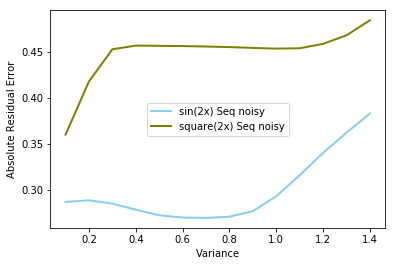

In [28]:
# Data
df=pd.DataFrame({'Variance': np.arange(0.1,1.5,0.1), 'sin(2x) Seq noisy': f1_error_list_seq_var, 'square(2x) Seq noisy': f2_error_list_seq_var})

# multiple line plot
plt.plot( 'Variance', 'sin(2x) Seq noisy', data=df, marker='', color='skyblue', linewidth=2)
plt.plot( 'Variance', 'square(2x) Seq noisy', data=df, marker='', color='olive', linewidth=2)
plt.xlabel("Variance")
plt.ylabel("Absolute Residual Error")
plt.legend()
plt.savefig('variance.png')

1 [0.0319947281404105, 0.0319947281404105, 0.0319947281404105, 0.0319947281404105, 0.0319947281404105, 0.0319947281404105, 0.0319947281404105]


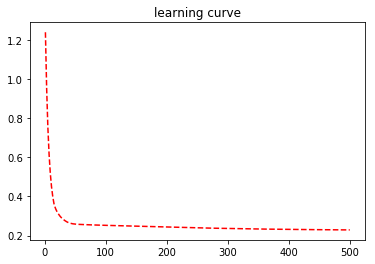

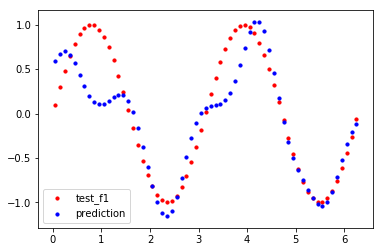

error: 0.22877250542789004


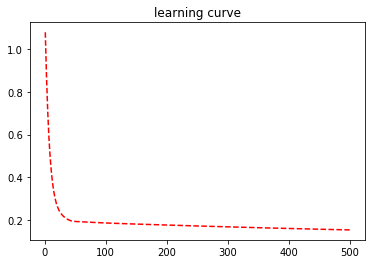

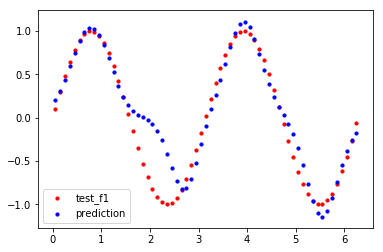

error: 0.1534500910505773


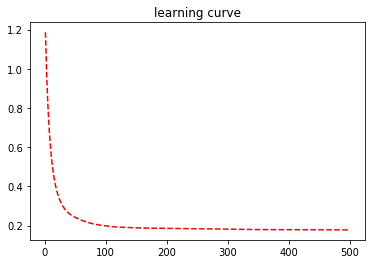

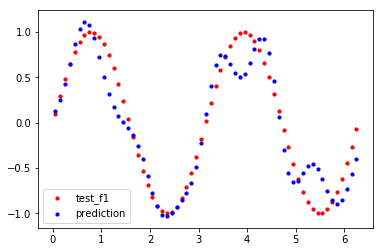

error: 0.1781882933546217


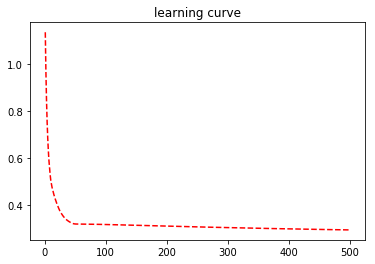

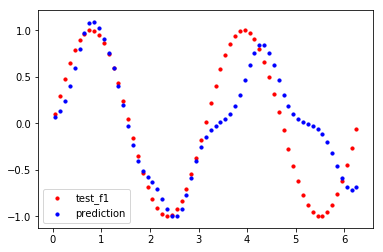

error: 0.29484519624447625


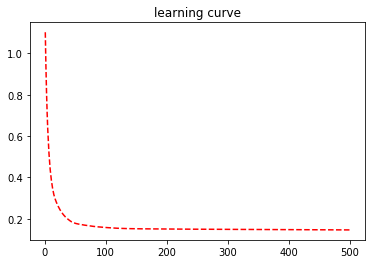

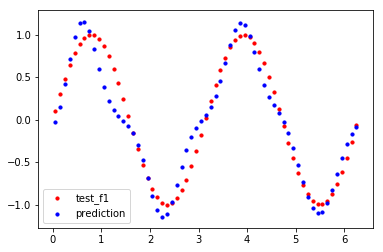

error: 0.14650896884043987


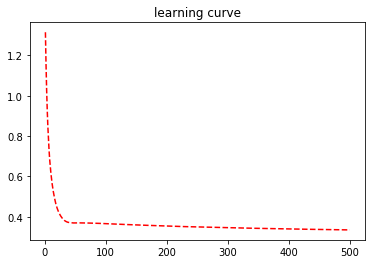

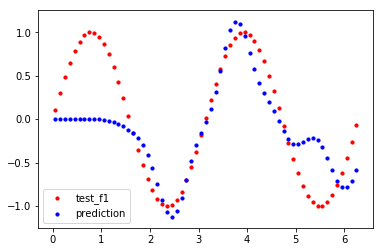

error: 0.335387943922099


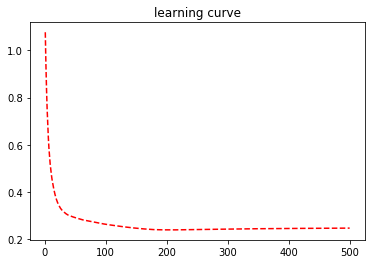

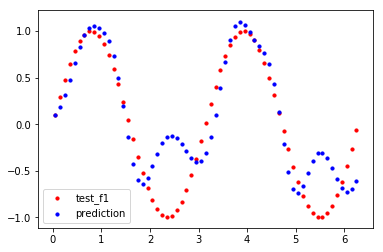

error: 0.2473765372108388


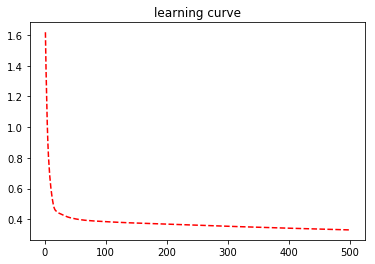

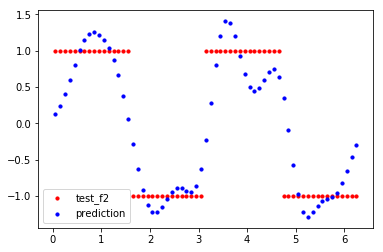

error: 0.3307864352414341


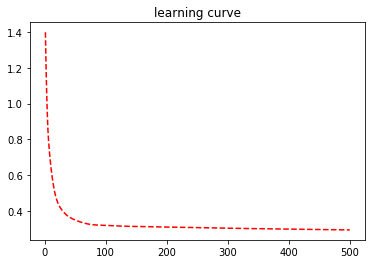

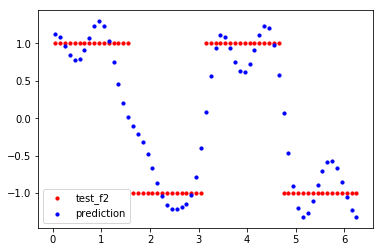

error: 0.2927781719548668


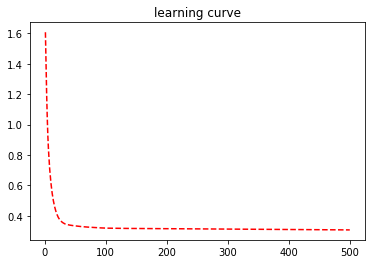

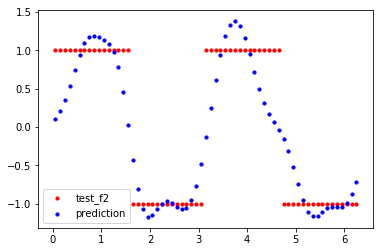

error: 0.3082814795190989


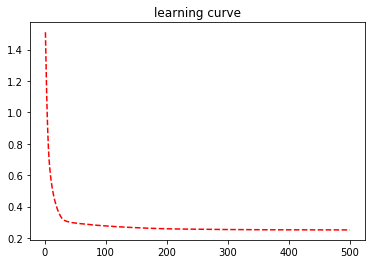

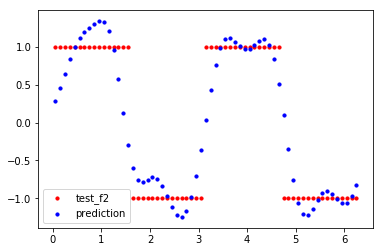

error: 0.25193049222374025


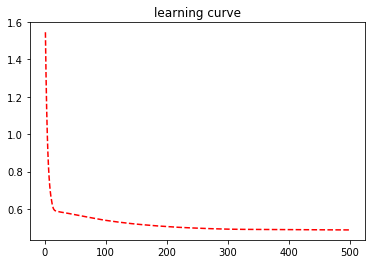

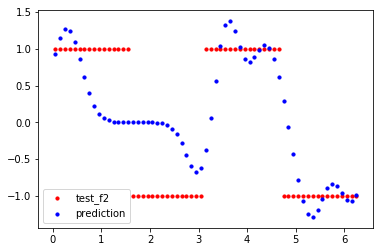

error: 0.48825067231852


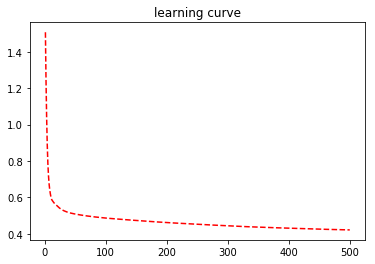

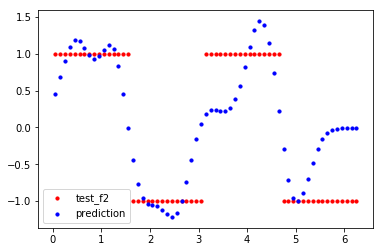

error: 0.42130783131031685


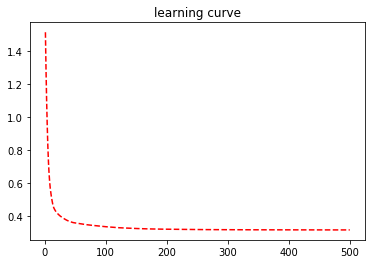

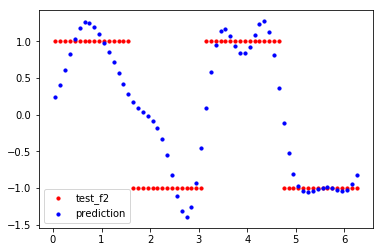

error: 0.31697006781476944


In [39]:
#RBF initlisations
f1_error_list_seq_equal = []
f1_error_list_batch_random = []
f2_error_list_seq_equal = []
f2_error_list_batch_random = []

learning_rate = 0.01
epoch = 500 
num_mu = 10

# mu_step = (2*pi) / num_mu
# mu = np.arange (0, 2*pi, mu_step)          
# var = [0.1 for i in range (0, len (mu))] 

for m in range(8,15):
    mu_step = (2*pi) / num_mu
    mu = np.arange (0, 2*pi, mu_step) 
    var = [0.1 for i in range (0, len (mu))] 
    
    pred, error = RBFlearning_seq_withoutCL_1D (train_in, train_f1, test_in, test_f1, 
                                            "test_f1", num_mu, mu, var, epoch, learning_rate )
    f1_error_list_seq_equal.append(error[-1])
    
print('1',f1_error_list_seq_equal)
    
for m in range(8,15):
    mu = []
    for i in range(0,num_mu):
        mu.append(round(random.uniform(0,2*pi),2))
        
    var = [0.1 for i in range (0, len (mu))] 
    
    pred, error = RBFlearning_batch_withoutCL_1D (train_in, train_f1, test_in, test_f1, 
                                            "test_f1", num_mu, mu, var, epoch, learning_rate )
    f1_error_list_batch_random.append(error[-1])

for m in range(8,15):
    num_mu = m
    mu_step = (2*pi) / num_mu
    mu = np.arange (0, 2*pi, mu_step) 
    var = [0.1 for i in range (0, len (mu))] 
    
    pred, error = RBFlearning_seq_withoutCL_1D (train_in, train_f2, test_in, test_f2, 
                                            "test_f2", num_mu, mu, var, epoch, learning_rate )
    f2_error_list_seq_equal.append(error[-1])
    
for m in range(8,15):
    mu = []
    for i in range(0,num_mu):
        mu.append(round(random.uniform(0,2*pi),2))
        
    var = [0.1 for i in range (0, len (mu))] 
    
    pred, error = RBFlearning_batch_withoutCL_1D (train_in, train_f2, test_in, test_f2, 
                                            "test_f2", num_mu, mu, var, epoch, learning_rate )
    f2_error_list_batch_random.append(error[-1])


# print("f1_error_list_seq_clean",f1_error_list_seq_clean)
# print("f1_error_list_batch_clean",f1_error_list_batch_clean)
# print("f2_error_list_seq_clean",f2_error_list_seq_clean)
# print("f2_error_list_batch_clean",f2_error_list_batch_clean)

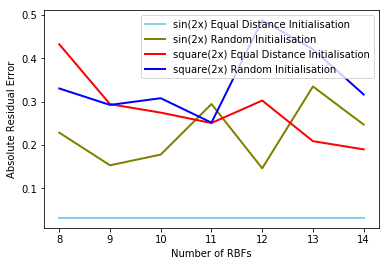

In [41]:
# Data
df=pd.DataFrame({'Number of RBFs': range(8,15), 'sin(2x) Equal Distance Initialisation': f1_error_list_seq_equal, 'sin(2x) Random Initialisation': f1_error_list_batch_random, 'square(2x) Equal Distance Initialisation': f2_error_list_seq_equal, 'square(2x) Random Initialisation': f2_error_list_batch_random})

# multiple line plot
plt.plot( 'Number of RBFs', 'sin(2x) Equal Distance Initialisation', data=df, marker='', color='skyblue', linewidth=2)
plt.plot( 'Number of RBFs', 'sin(2x) Random Initialisation', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'Number of RBFs', 'square(2x) Equal Distance Initialisation', data=df, marker='', color='red', linewidth=2)
plt.plot( 'Number of RBFs', 'square(2x) Random Initialisation', data=df, marker='', color='blue', linewidth=2)
plt.xlabel("Number of RBFs")
plt.ylabel("Absolute Residual Error")
plt.legend()
plt.savefig('rbfconfig.png')

## 3.3 

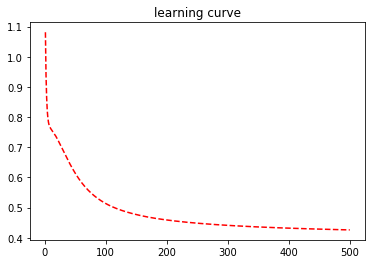

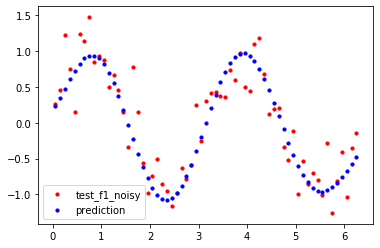

error: 0.42596120119418895


In [15]:
def competitive_learning ( mu, train_in, train_out, win_percentage,lose_percentage): # mu is a list of RBF centers
    random_point_index = random.randrange(len(train_out))
    chosen_point = train_out[random_point_index]
    distance=np.zeros(len(mu))
    for m in range(0, len(mu)):
        measure = mu[m] - chosen_point
        distance[m] = abs(measure)            
    index_winning = np.argmin(distance)
    mu_update = learning_rate * (chosen_point - mu[index_winning])  #rbf position update 
    mu[index_winning] += win_percentage * mu_update                 #rbf position update 

    #avoid dead units- all RBFs get updated -comment out if not needed
    for l in range(0, len(mu)):
        if l != index_winning:
            mu_update_lose = learning_rate * (chosen_point - mu[l])
            mu[l] += lose_percentage * mu_update_lose

    return mu

def RBFlearning_seq_withCL_1D (train_in, train_out, test_in, test_out,
                               label_test_out, num_mu, mu, var, epoch, learning_rate,
                               win_percentage, lose_percentage):
    mu_cl = competitive_learning (mu, train_in, train_out, win_percentage,lose_percentage)
    
    error_list=[]
    w = np.array([1 for i in range (0, len (mu))])
    for a in range(epoch): 
        for i in range(len(train_in)):
            chosen_point = train_in[i]
            RBF_matrix = compute_RBF_matrix_seq (chosen_point, mu_cl, var)                 
            calculated_target = np.dot(RBF_matrix.T, w)  
            diff = train_out[i] - calculated_target
            delta_w = learning_rate * (diff*(RBF_matrix.T))
            w = w + delta_w
            
        pred_f1 = predict_seq (test_out, w, mu, var )
        e = absolute_residual_error(pred_f1, test_out, test_in)   #one of the last 2 is the noisy test data, one is the correct data
        error_list.append(e)

    draw_learning_curve(error_list)
    draw_2_scatters (test_in, test_out, 'r', label_test_out,  pred, 'b', 'prediction')
    print ("error:", error_list[-1])
    return 

learning_rate = 0.01
epoch = 500
num_mu = 8
mu_step = (2*pi) / num_mu
mu = np.arange (0, 2*pi, mu_step) 
var = [0.4 for i in range (0, len (mu))] 


win_percentage = 1
lose_percentage = 0.01 #(1- win_percentage) / len(mu)

RBFlearning_seq_withCL_1D (train_in, train_f1_noisy, test_in, test_f1_noisy, 
                           "test_f1_noisy",num_mu, mu, var, epoch, learning_rate, 
                           win_percentage, lose_percentage  )


In [29]:
w = np.array([random.randrange(0,1,)])
print (w)

[0]
